<center>
    <h1 style="color: blue;">RAINFALL FORECASTING MODEL FOR AN AUSTRALIAN WEATHER FORECASTING COMPANY</h1>
    <h3>Reshma Rajan</h3>
    
</center>

<div style="background-color:brown; color:white; padding:20px">
    <h2>1. BUSINESS OBJECTIVES</h2>
</div>


**Increase Market Share** : Utilize the predictive models to provide superior forecasts, aiming to capture a larger share of the weather app market.

**Improve Decision Support for Clients**: Offer businesses and individuals more accurate weather prediction tools to help them make informed decisions, thereby positioning company as a critical decision-support partner.

**Enhance User Experience** : Ensure the weather app delivers user-friendly and accurate forecasts, encouraging regular engagement and establishing the app as a daily necessity for users.

**Drive Revenue Growth**: Monetize the predictive capabilities through subscription services, partnerships with industries affected by weather conditions, and in-app purchases for detailed forecasts.

**Strengthen Brand Reputation**: Build a reputation as the most reliable and precise weather forecasting app available, which can significantly enhance the company's brand and attract new customers.

**Expand B2B Services** : Use the predictive models to offer bespoke weather-related services to sectors like agriculture, shipping, and outdoor event planning, creating new business-to-business revenue streams.

<div style="background-color:brown;  color:white; padding:20px">
<h2> 2. TECHNICAL OBJECTIVES </h2>
</div>

**Data Collection** Collect comprehensive meteorological data such as windspeed, temperature, humidity, and other relevant variables from carious weather stations across Australia.

**Data Cleansing** Implement preprocessing steps to clean, normalize, and transform the data into a format suitable for model training.

**Data Visualisation** Build a dynamic dashboard for client to identify patterns and trends from complex weather data.

**K-Means Clustering**  Create a K-Means clustering to identify locations sharing similar weather conditions.

**Hieracrchial Clustering** Build a hierarchial cluster to identify the distribution of null values among variables.

**Algorithm Selection and Optimization**:Choose appropriate machine learning algorithms for the classification task to predict the liklihood of rain ( RainTomorrow).Optimize these algorithms through hyperparameter tuning to achieve the best possible predictive performance.

**Model Accuracy and Validation**:Develop a highly accurate binary classification model using logistic regression and Random Forest to predict the occurrence of rain the next day.Validate both models using historical meteorological data to ensure their reliability and accuracy.

**Choose the best model** : Compare the performance matrix of both the model and choose the best prediction model for the client.

<div style="background-color:brown;  color:white; padding:20px">
<h2>2.  IMPORT LIBRARIES </h2>
</div>

In [1]:
#Importing libraries and nick naming them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt
from sqlalchemy import create_engine

%matplotlib inline
pd.set_option('display.max_columns',500) 
plt.style.use('seaborn-colorblind') 
sns.set_style('whitegrid')

/var/folders/7w/g9brbv890v97g2cg68b46dsw0000gn/T/ipykernel_62914/499387895.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


<div style="background-color:brown;  color:white; padding:20px">
<h2> 3.  IMPORT DATA </h2>
</div>

* The data is sourced from Kaggle titled "Rain in Australia' from the link https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


* This dataset is a collection of weather observations on a daily basis. The dataset has 23 variables with 145460 rows of data. The observation in the data is at day level. Time frame that the data covers is 10 years (2007-2017). Each row represents the meteorological variables on a particular day. The data set consist of both numerical as well as categorical variable. Numeric variable includes humidity, presuure, temperature, cloud, evaporation, sunshine. While the categorical variable includes the location, wind direction , wind gust direction etc.


In [2]:
#Import weatherAUS.csv  as df_crain
df_rain = pd.read_csv('/Users/reshmarajan/Desktop/DATA 6330/rain/weatherAUS.csv', index_col = None, header=0)
df_rain.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [3]:
# checking the variables and the data types in the dataset
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

* The dataset contains numerical as well as object datatypes. Also, 'Date' variable needs to be converted to date data type and thus it needs to be splitted into day, month and year as seperate columns.

<div style="background-color:brown;  color:white; padding:20px">
<h2> 4.  DATA EXPLORATION</h2>
</div>

In [4]:
# check for duplicate rows
duplicate_rows = df_rain.duplicated().sum()

if duplicate_rows > 0:
    print(f"There are {duplicate_rows} duplicate rows in the DataFrame.")
else:
    print("There are no duplicate rows in the DataFrame.")


There are no duplicate rows in the DataFrame.


In [5]:
# check for null values
null_values = df_rain.isnull().sum()
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [6]:
# Convert the 'date' column to datetime format
df_rain['Date'] = pd.to_datetime(df_rain['Date'])

In [7]:
# extract year in date

df_rain['Year'] = df_rain['Date'].dt.year

In [8]:
# extract month from date

df_rain['Month'] = df_rain['Date'].dt.month

In [9]:
# extract day from date

df_rain['Day'] = df_rain['Date'].dt.day

df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [10]:
# drop the original Date variable

df_rain.drop('Date', axis=1, inplace = True)

In [11]:
# label encoding RainToday and RainTomorrow
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'RainToday' and 'RainTomorrow' columns
df_rain['RainToday'] = label_encoder.fit_transform(df_rain['RainToday'])
df_rain['RainTomorrow'] = label_encoder.fit_transform(df_rain['RainTomorrow'])

In [12]:
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

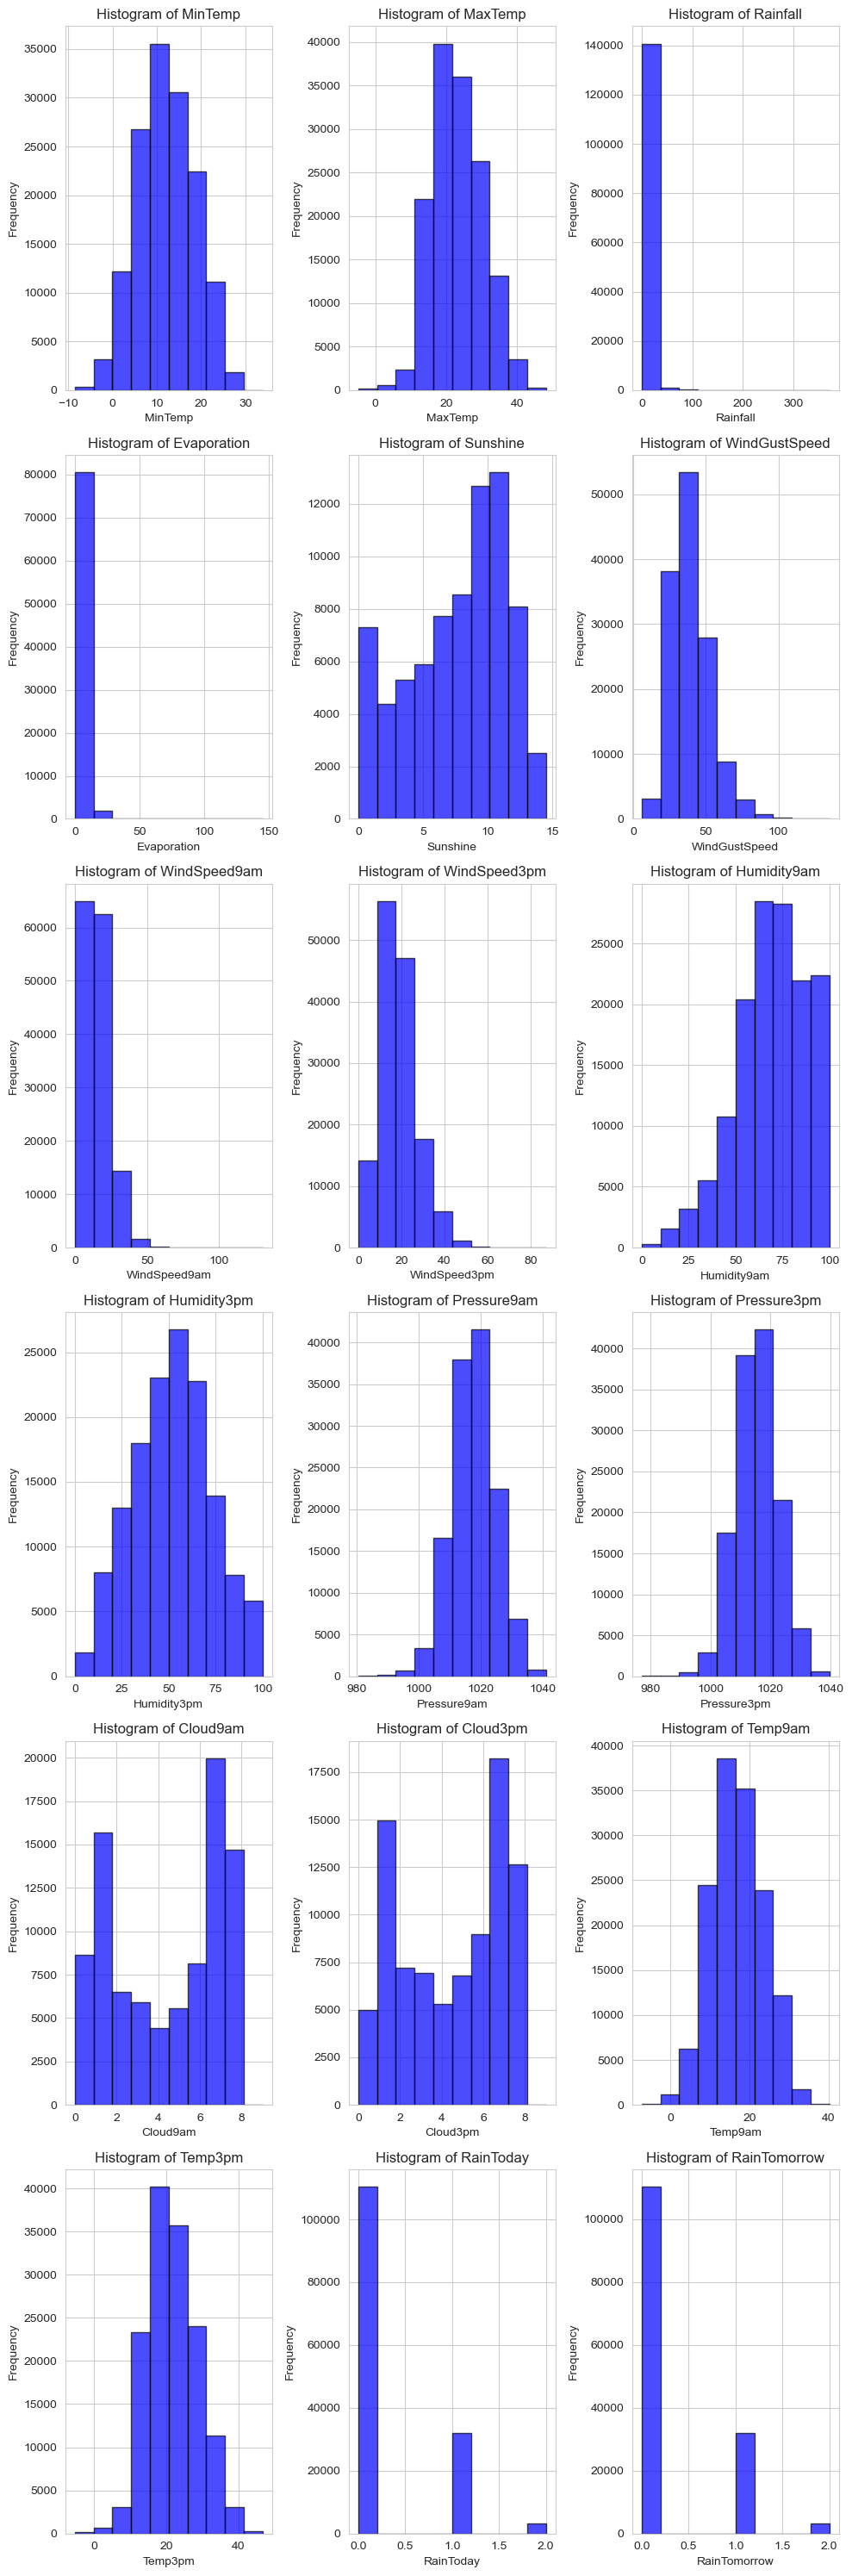

In [13]:
# Select only numeric columns and exclude 'day', 'month', and 'year'
numeric_df = df_rain.select_dtypes(include=['int64', 'float64']).drop(columns=['Day', 'Month', 'Year'])

# Determine the number of rows/columns for the subplot grid
n_cols = 3  # Choose an appropriate number of columns for the subplot grid
n_rows = (len(numeric_df.columns) + n_cols - 1) // n_cols  # Ensure there are enough rows for all histograms

# Create a figure for the histograms
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))  # Adjust the figure size as necessary
axs = axs.flatten()  # Flatten the array of axes

# Loop over the numeric columns and create a histogram on the corresponding subplot
for i, col in enumerate(numeric_df.columns):
    axs[i].hist(numeric_df[col], bins=10, alpha=0.7, color='blue', edgecolor='black')
    axs[i].set_title(f'Histogram of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

# If there are any subplots without data, hide them
for ax in axs[len(numeric_df.columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

#Observations:

* Most of the variables are distributed normally.
* The Rainfall distribution needs to be investigated due to the presence of outlier.


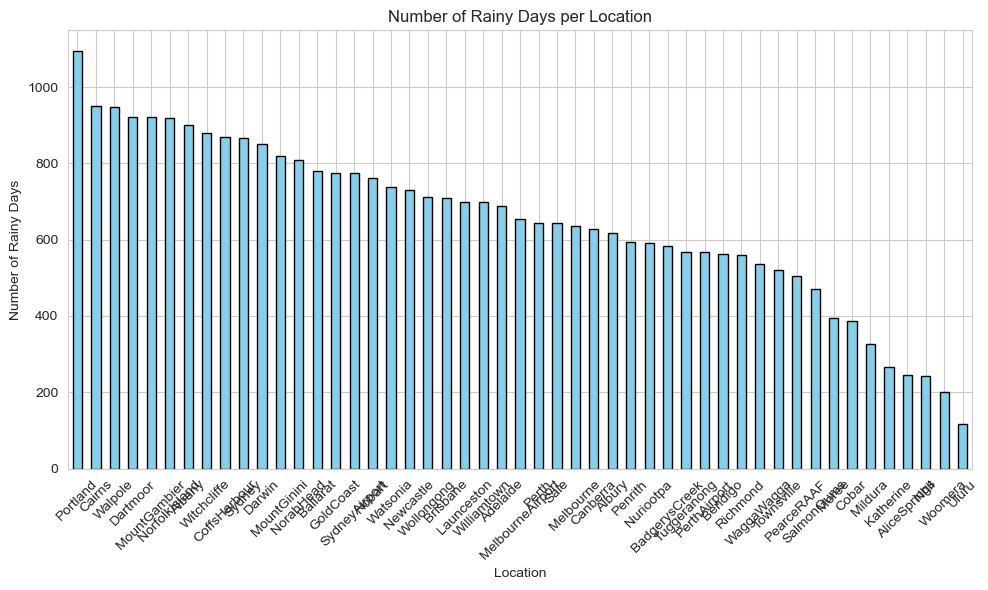

In [59]:
# Filter the DataFrame for rows where RainToday is 1
rainy_days_df = df_rain[df_rain['RainToday'] == 1]

# Count the number of rainy days for each location
rainy_days_count = rainy_days_df['Location'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
rainy_days_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Rainy Days per Location')
plt.xlabel('Location')
plt.ylabel('Number of Rainy Days')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

** Places that had the most number of rainfall days are Portland, Cairns, Walpole while the places with least number of rainfall days are Uluru, Woomers, Alice Springs

In [14]:
#checking value count for location
df_rain['Location'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


* Locations like 'Uluru', 'Nhil' and 'Katherine' has only few data points. Hence that loactions can be excluded

In [15]:
# excluding rows having  'Uluru', 'Nhil' and 'Katherine' as location
# List of locations to exclude
locations_to_exclude = ['Uluru', 'Nhil', 'Katherine']

# Exclude the rows where Location is in the list of locations to exclude
df_rain_filtered = df_rain[~df_rain['Location'].isin(locations_to_exclude)]

df_rain_filtered

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
142299   Darwin     21.2     32.6       0.0          7.6       8.6   
142300   Darwin     20.7     32.8       0.0          5.6      11.0   
142301   Darwin     19.5     31.8       0.0          6.2      10.6   
142302   Darwin     20.2     31.7       0.0          5.6      10.7   
142303   Darwin     19.3      NaN       0.0          5.0       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0                W           44.0          W        WNW          20.0   
1              WNW           44.0        NNW        WSW           4.0   
2              WSW           46.0          W        WSW          19.0   
3               NE           24.0         SE          E          11.0   
4                W           41.0        ENE         NW           7.0   
...            ...            ...        ...        ...           ...   
142299           E           37.0         SE         SE          13.0   
142300           E           33.0          E          W          17.0   
142301         ESE           26.0         SE        NNW           9.0   
142302         ENE           30.0        ENE        NNW          15.0   
142303         NaN            NaN          E        NNW          13.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0               24.0         71.0         22.0       1007.7       1007.1   
1               22.0         44.0         25.0       1010.6       1007.8   
2               26.0         38.0         30.0       1007.6       1008.7   
3                9.0         45.0         16.0       1017.6       1012.8   
4               20.0         82.0         33.0       1010.8       1006.0   
...              ...          ...          ...          ...          ...   
142299          11.0         56.0         28.0       1014.6       1011.2   
142300          11.0         46.0         23.0       1015.3       1011.8   
142301          17.0         62.0         58.0       1014.9       1010.7   
142302           7.0         73.0         32.0       1013.9       1009.7   
142303          17.0         68.0         45.0       1013.9       1010.7   

        Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Year  \
0            8.0       NaN     16.9     21.8          0             0  2008   
1            NaN       NaN     17.2     24.3          0             0  2008   
2            NaN       2.0     21.0     23.2          0             0  2008   
3            NaN       NaN     18.1     26.5          0             0  2008   
4            7.0       8.0     17.8     29.7          0             0  2008   
...          ...       ...      ...      ...        ...           ...   ...   
142299       7.0       0.0     24.8     32.0          0             0  2017   
142300       0.0       0.0     24.8     32.1          0             0  2017   
142301       1.0       1.0     24.8     29.2          0             0  2017   
142302       6.0       5.0     25.4     31.0          0             0  2017   
142303       6.0       1.0     24.6     29.0          0             2  2017   

        Month  Day  
0          12    1  
1          12    2  
2          12    3  
3          12    4  
4          12    5  
...       ...  ...  
142299      6   21  
142300      6   22  
142301      6   23  
142302      6   24  
142303      6   25  

[140726 rows x 25 columns]

In [16]:
df_rain_by_loc = df_rain_filtered.groupby(by='Location').sum()
df_rain_by_loc = df_rain_filtered[['RainToday']]
df_rain_by_loc.head()

/var/folders/7w/g9brbv890v97g2cg68b46dsw0000gn/T/ipykernel_62914/1705105686.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rain_by_loc = df_rain_filtered.groupby(by='Location').sum()


RainToday
0          0
1          0
2          0
3          0
4          0

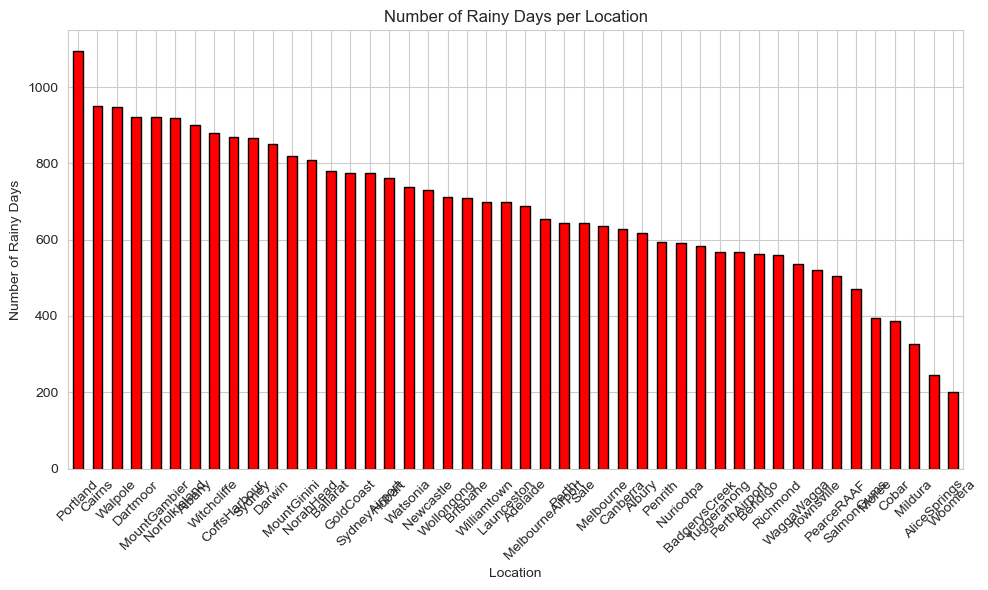

In [17]:
# Filter the DataFrame for rows where RainToday is 1
rainy_days_df = df_rain_filtered[df_rain_filtered['RainToday'] == 1]

# Count the number of rainy days for each location
rainy_days_count = rainy_days_df['Location'].value_counts()

# Create a bar chart with red color
plt.figure(figsize=(10, 6))  # Adjust the figure size as necessary
rainy_days_count.plot(kind='bar', color='red', edgecolor='black')
plt.title('Number of Rainy Days per Location')
plt.xlabel('Location')
plt.ylabel('Number of Rainy Days')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()

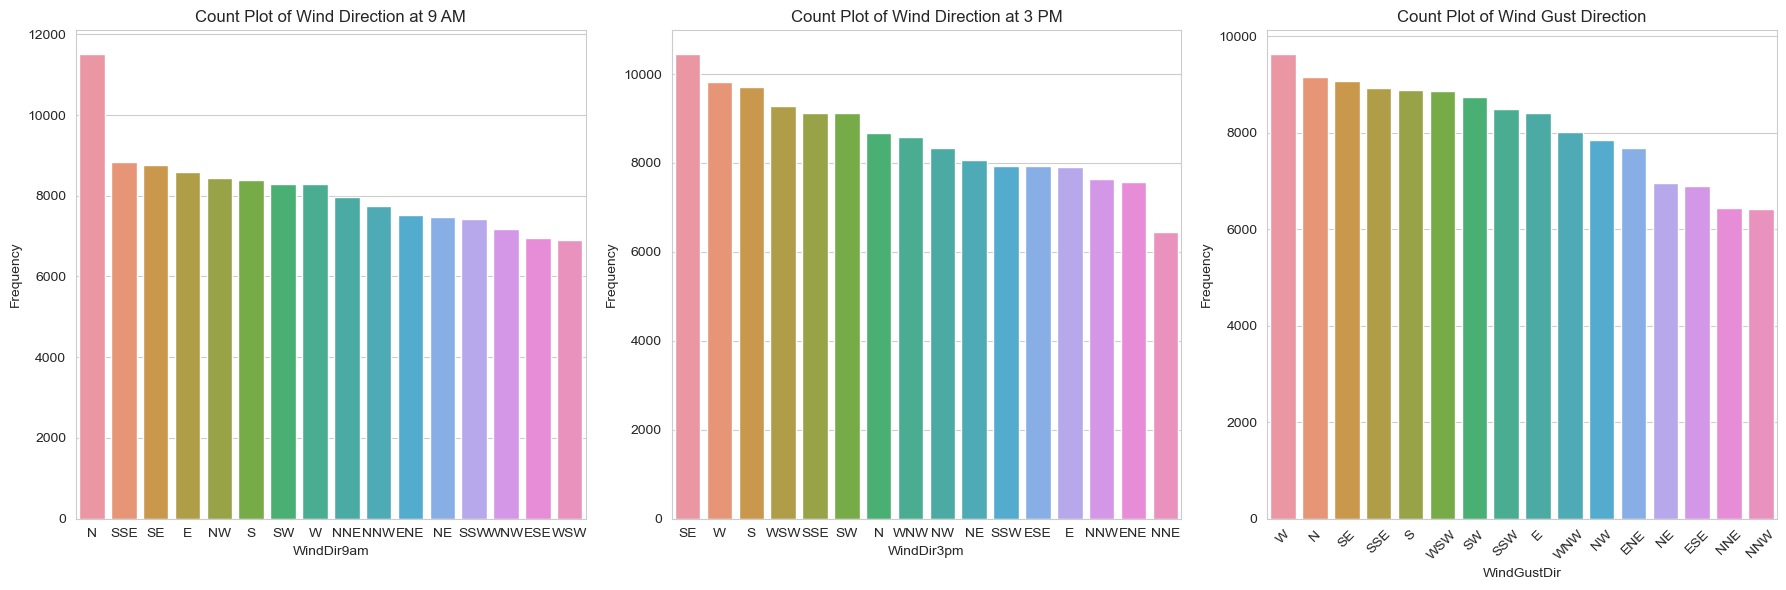

In [64]:
# Create a figure with 3 subplots (one for each wind direction) and set the figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Titles for each subplot
titles = ['Wind Direction at 9 AM', 'Wind Direction at 3 PM', 'Wind Gust Direction']

# Plotting
for ax, column, title in zip(axes, ['WindDir9am', 'WindDir3pm', 'WindGustDir'], titles):
    sns.countplot(x=df_rain_filtered[column], order=df_rain_filtered[column].value_counts().index, ax=ax)
    ax.set_title(f'Count Plot of {title}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

** Wind direction at 9 am is mostly in North direction, Wind direction at 3pm is distributed almost uniformly but mostly in South East direction. 

/var/folders/7w/g9brbv890v97g2cg68b46dsw0000gn/T/ipykernel_62914/765239819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_filtered['Year_Month'] = df_rain_filtered['Year'].astype(str) + '-' + df_rain_filtered['Month'].astype(str).str.zfill(2)
/var/folders/7w/g9brbv890v97g2cg68b46dsw0000gn/T/ipykernel_62914/765239819.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)  # Smaller font size for labels
/var/folders/7w/g9brbv890v97g2cg68b46dsw0000gn/T/ipykernel_62914/765239819.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)  # Smaller font si

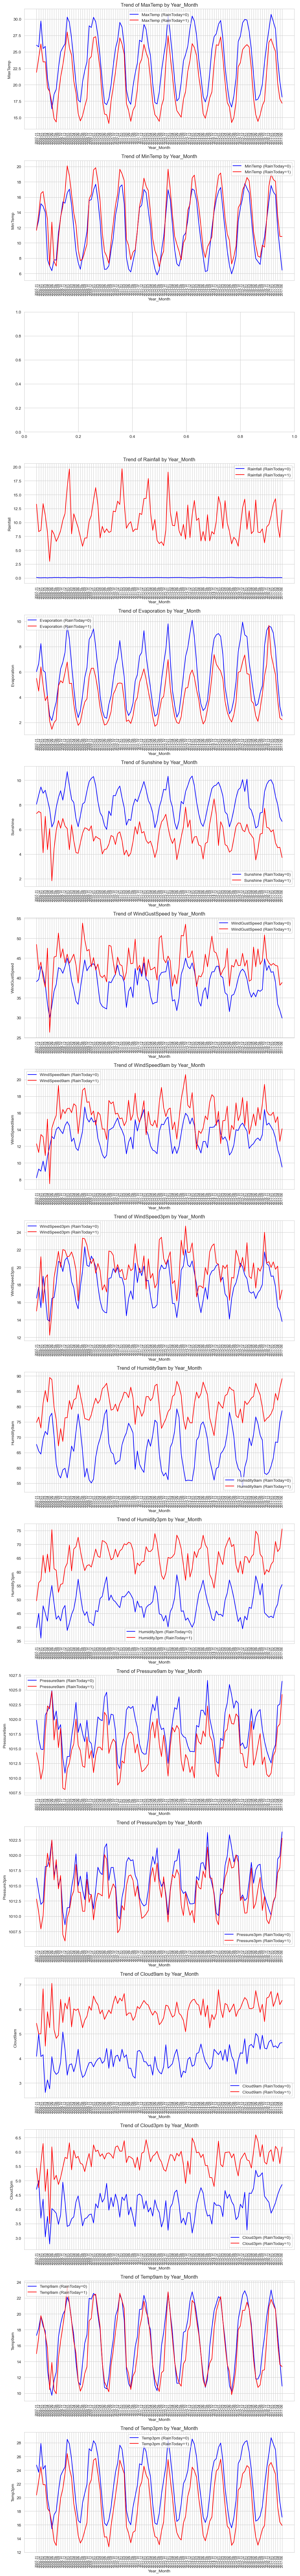

In [19]:
# Combine the Year and Month into a single column if not already done
df_rain_filtered['Year_Month'] = df_rain_filtered['Year'].astype(str) + '-' + df_rain_filtered['Month'].astype(str).str.zfill(2)

# Define the columns you want to aggregate and plot
cols = ['MaxTemp', 'MinTemp', 'DiffTemp', 'Rainfall', 'Evaporation', 'Sunshine', 
        'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 
        'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Create a large figure to accommodate all subplots
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(10, 5 * len(cols)))

for ax, col in zip(axes, cols):
    # Aggregate data by Year_Month and RainToday
    if col in df_rain_filtered.columns:
        aggregated_data = df_rain_filtered.groupby(['Year_Month', 'RainToday'])[col].mean().unstack()
        # Plot each line for RainToday 0 and 1
        if 0 in aggregated_data.columns:
            ax.plot(aggregated_data.index, aggregated_data[0], label=f'{col} (RainToday=0)', linestyle='-', color='blue')
        if 1 in aggregated_data.columns:
            ax.plot(aggregated_data.index, aggregated_data[1], label=f'{col} (RainToday=1)', linestyle='-', color='red')
        
        ax.set_title(f'Trend of {col} by Year_Month')
        ax.set_xlabel('Year_Month')
        ax.set_ylabel(col)
        ax.legend()
        # Rotate x-axis labels vertically and set smaller font size
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)  # Smaller font size for labels

plt.tight_layout()
plt.show()

In [20]:
df_rain_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140726 entries, 0 to 142303
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140726 non-null  object 
 1   MinTemp        139330 non-null  float64
 2   MaxTemp        139518 non-null  float64
 3   Rainfall       137548 non-null  float64
 4   Evaporation    81185 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    130494 non-null  object 
 7   WindGustSpeed  130557 non-null  float64
 8   WindDir9am     130316 non-null  object 
 9   WindDir3pm     136554 non-null  object 
 10  WindSpeed9am   139001 non-null  float64
 11  WindSpeed3pm   137705 non-null  float64
 12  Humidity9am    138173 non-null  float64
 13  Humidity3pm    137064 non-null  float64
 14  Pressure9am    125677 non-null  float64
 15  Pressure3pm    125712 non-null  float64
 16  Cloud9am       87687 non-null   float64
 17  Cloud3pm       84831 non-null

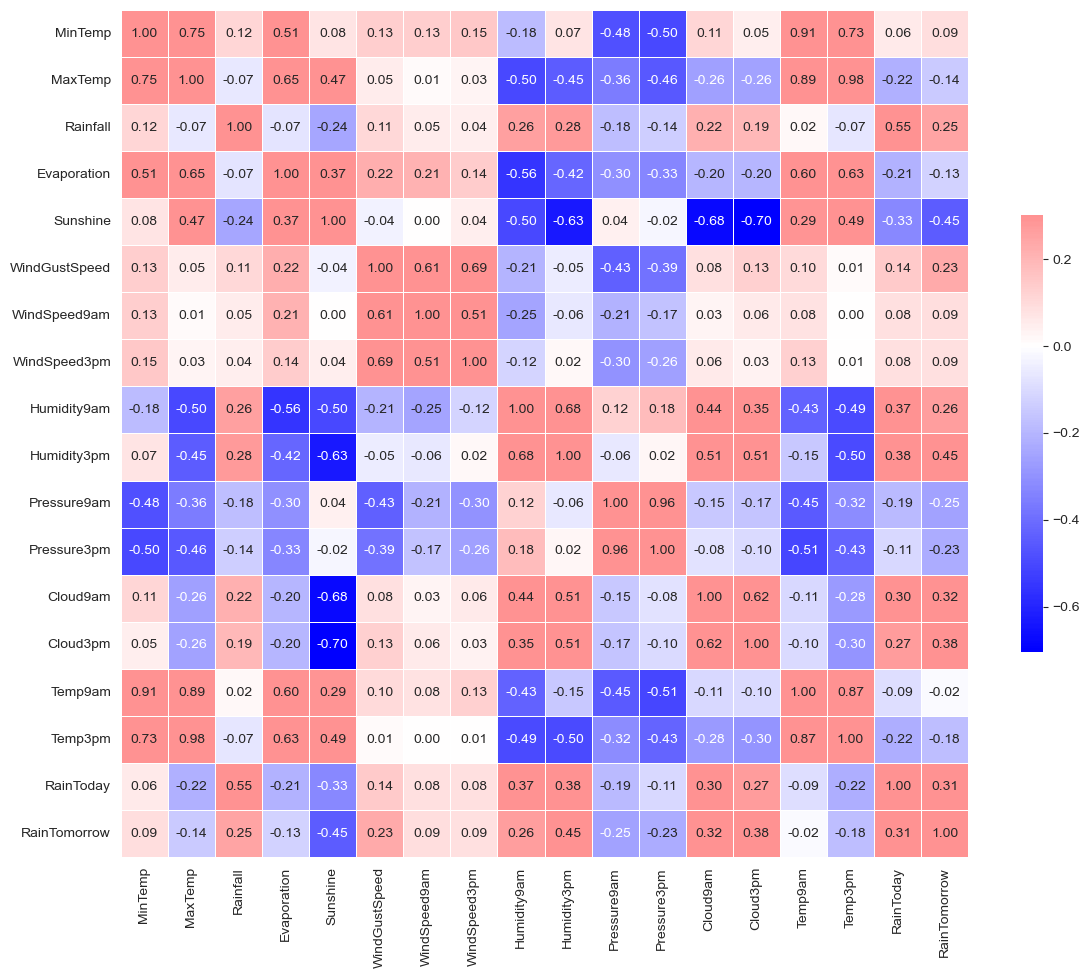

In [21]:
# List of columns for which you want to compute the correlation matrix
columns = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
    'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'
]

# Filter the DataFrame to include only the columns of interest
df_filtered = df_rain_filtered[columns].dropna()  # Optional: drop rows with any NaN values

# Compute the correlation matrix
corr_matrix = df_filtered.corr()


# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='bwr',
            vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Adjust layout for better fit and display the plot
plt.tight_layout()
plt.show()

** From the heat map showing the correlation between variables, the maximum correlation is shown between temperatures at different times.

<div style="background-color:brown;  color:white; padding:20px">
<h2> 5.  PRE-PROCESSING OF DATA</h2>
</div>

In [22]:
# Check for null values
# check for null values
null_values = df_rain_filtered.isnull().sum()
print("Number of null values in each column:")
print(null_values)

Number of null values in each column:
Location             0
MinTemp           1396
MaxTemp           1208
Rainfall          3178
Evaporation      59541
Sunshine         65101
WindGustDir      10232
WindGustSpeed    10169
WindDir9am       10410
WindDir3pm        4172
WindSpeed9am      1725
WindSpeed3pm      3021
Humidity9am       2553
Humidity3pm       3662
Pressure9am      15049
Pressure3pm      15014
Cloud9am         53039
Cloud3pm         55895
Temp9am           1705
Temp3pm           2876
RainToday            0
RainTomorrow         0
Year                 0
Month                0
Day                  0
Year_Month           0
dtype: int64


In [23]:
# Columns  specified with missing values
columns_with_na = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]

# Loop through each column and fill missing values with the median of that column
for column in columns_with_na:
    median_value = df_rain_filtered[column].median()
    df_rain_filtered[column].fillna(median_value, inplace=True)

# Confirm changes
print(df_rain_filtered.isnull().sum())


Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10232
WindGustSpeed        0
WindDir9am       10410
WindDir3pm        4172
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
Year                 0
Month                0
Day                  0
Year_Month           0
dtype: int64


/var/folders/7w/g9brbv890v97g2cg68b46dsw0000gn/T/ipykernel_62914/518415485.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_filtered[column].fillna(median_value, inplace=True)


In [24]:
# Fill missing values in categorical columns with the most frequent category (mode)
categorical_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value='Missing')

# Apply imputer to categorical columns
df_rain_filtered[categorical_columns] = imputer.fit_transform(df_rain_filtered[categorical_columns])

/var/folders/7w/g9brbv890v97g2cg68b46dsw0000gn/T/ipykernel_62914/3808855902.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_filtered[categorical_columns] = imputer.fit_transform(df_rain_filtered[categorical_columns])


In [25]:
print(df_rain_filtered.isnull().sum())

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
Year_Month       0
dtype: int64


In [26]:
df_rain_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140726 entries, 0 to 142303
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140726 non-null  object 
 1   MinTemp        140726 non-null  float64
 2   MaxTemp        140726 non-null  float64
 3   Rainfall       140726 non-null  float64
 4   Evaporation    140726 non-null  float64
 5   Sunshine       140726 non-null  float64
 6   WindGustDir    140726 non-null  object 
 7   WindGustSpeed  140726 non-null  float64
 8   WindDir9am     140726 non-null  object 
 9   WindDir3pm     140726 non-null  object 
 10  WindSpeed9am   140726 non-null  float64
 11  WindSpeed3pm   140726 non-null  float64
 12  Humidity9am    140726 non-null  float64
 13  Humidity3pm    140726 non-null  float64
 14  Pressure9am    140726 non-null  float64
 15  Pressure3pm    140726 non-null  float64
 16  Cloud9am       140726 non-null  float64
 17  Cloud3pm       140726 non-nul

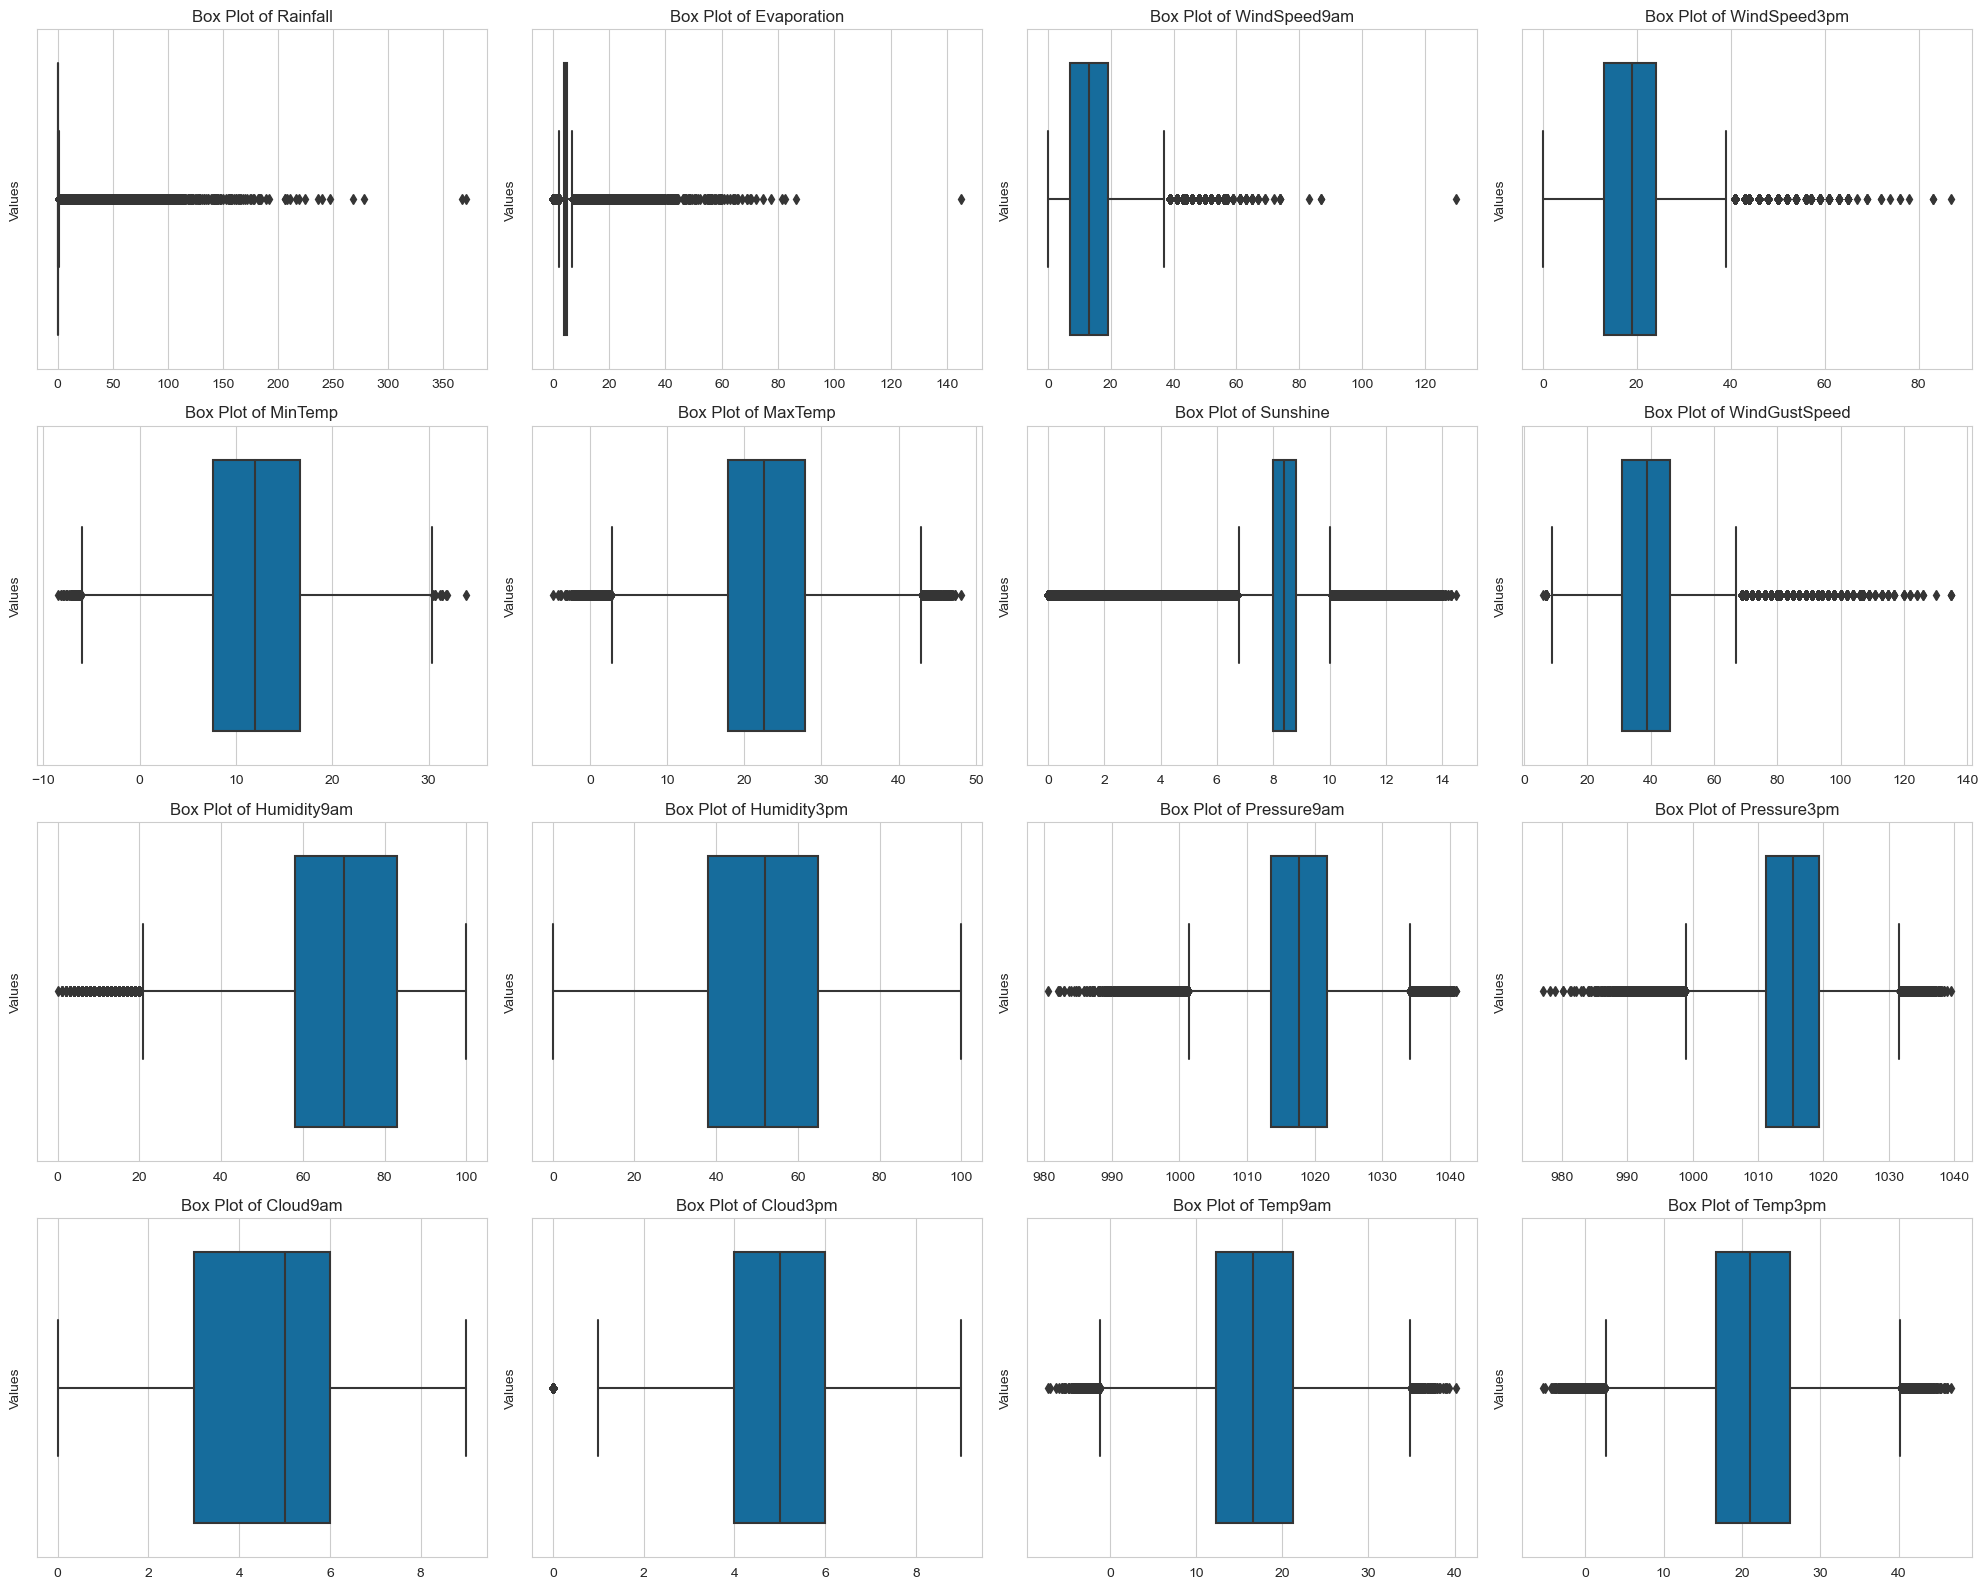

In [27]:
# Sample data loading and preparation part is omitted. Use df_rain_filtered DataFrame.
variables = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'MinTemp', 'MaxTemp', 'Sunshine', 'WindGustSpeed',
             'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Determine the number of rows/columns for the subplot grid
n_cols = 4  # Number of columns
n_rows = (len(variables) + n_cols - 1) // n_cols  # Ensures enough rows to accommodate all variables

# Create a large figure to hold all subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))  # Adjust the figure size accordingly

# Flatten axes array for easier iteration (if there's only one row, axes might not be a 2D array)
axes = axes.flatten()

# Plot each variable in a separate subplot
for ax, variable in zip(axes, variables):
    sns.boxplot(x=df_rain_filtered[variable], ax=ax)
    ax.set_title(f'Box Plot of {variable}')
    ax.set_xlabel('')
    ax.set_ylabel('Values')

# If there are any extra subplot areas, turn them off
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

In [28]:
#dealing with outliers in the numerical variables such as 'Rainfall', 'Evaporation' and 'Sunshine'
from scipy.stats import mstats

# Apply Winsorizing to the 'Rainfall', 'Evaporation', and 'Sunshine' columns
df_rain_filtered['Rainfall'] = mstats.winsorize(df_rain_filtered['Rainfall'], limits=[0.05, 0.05])
df_rain_filtered['Evaporation'] = mstats.winsorize(df_rain_filtered['Evaporation'], limits=[0.05, 0.05])
df_rain_filtered['Sunshine'] = mstats.winsorize(df_rain_filtered['Sunshine'], limits=[0.05, 0.05])

/var/folders/7w/g9brbv890v97g2cg68b46dsw0000gn/T/ipykernel_62914/165328044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_filtered['Rainfall'] = mstats.winsorize(df_rain_filtered['Rainfall'], limits=[0.05, 0.05])
/var/folders/7w/g9brbv890v97g2cg68b46dsw0000gn/T/ipykernel_62914/165328044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rain_filtered['Evaporation'] = mstats.winsorize(df_rain_filtered['Evaporation'], limits=[0.05, 0.05])
/var/folders/7w/g9brbv890v97g2cg68b46dsw0000gn/T/ipyke

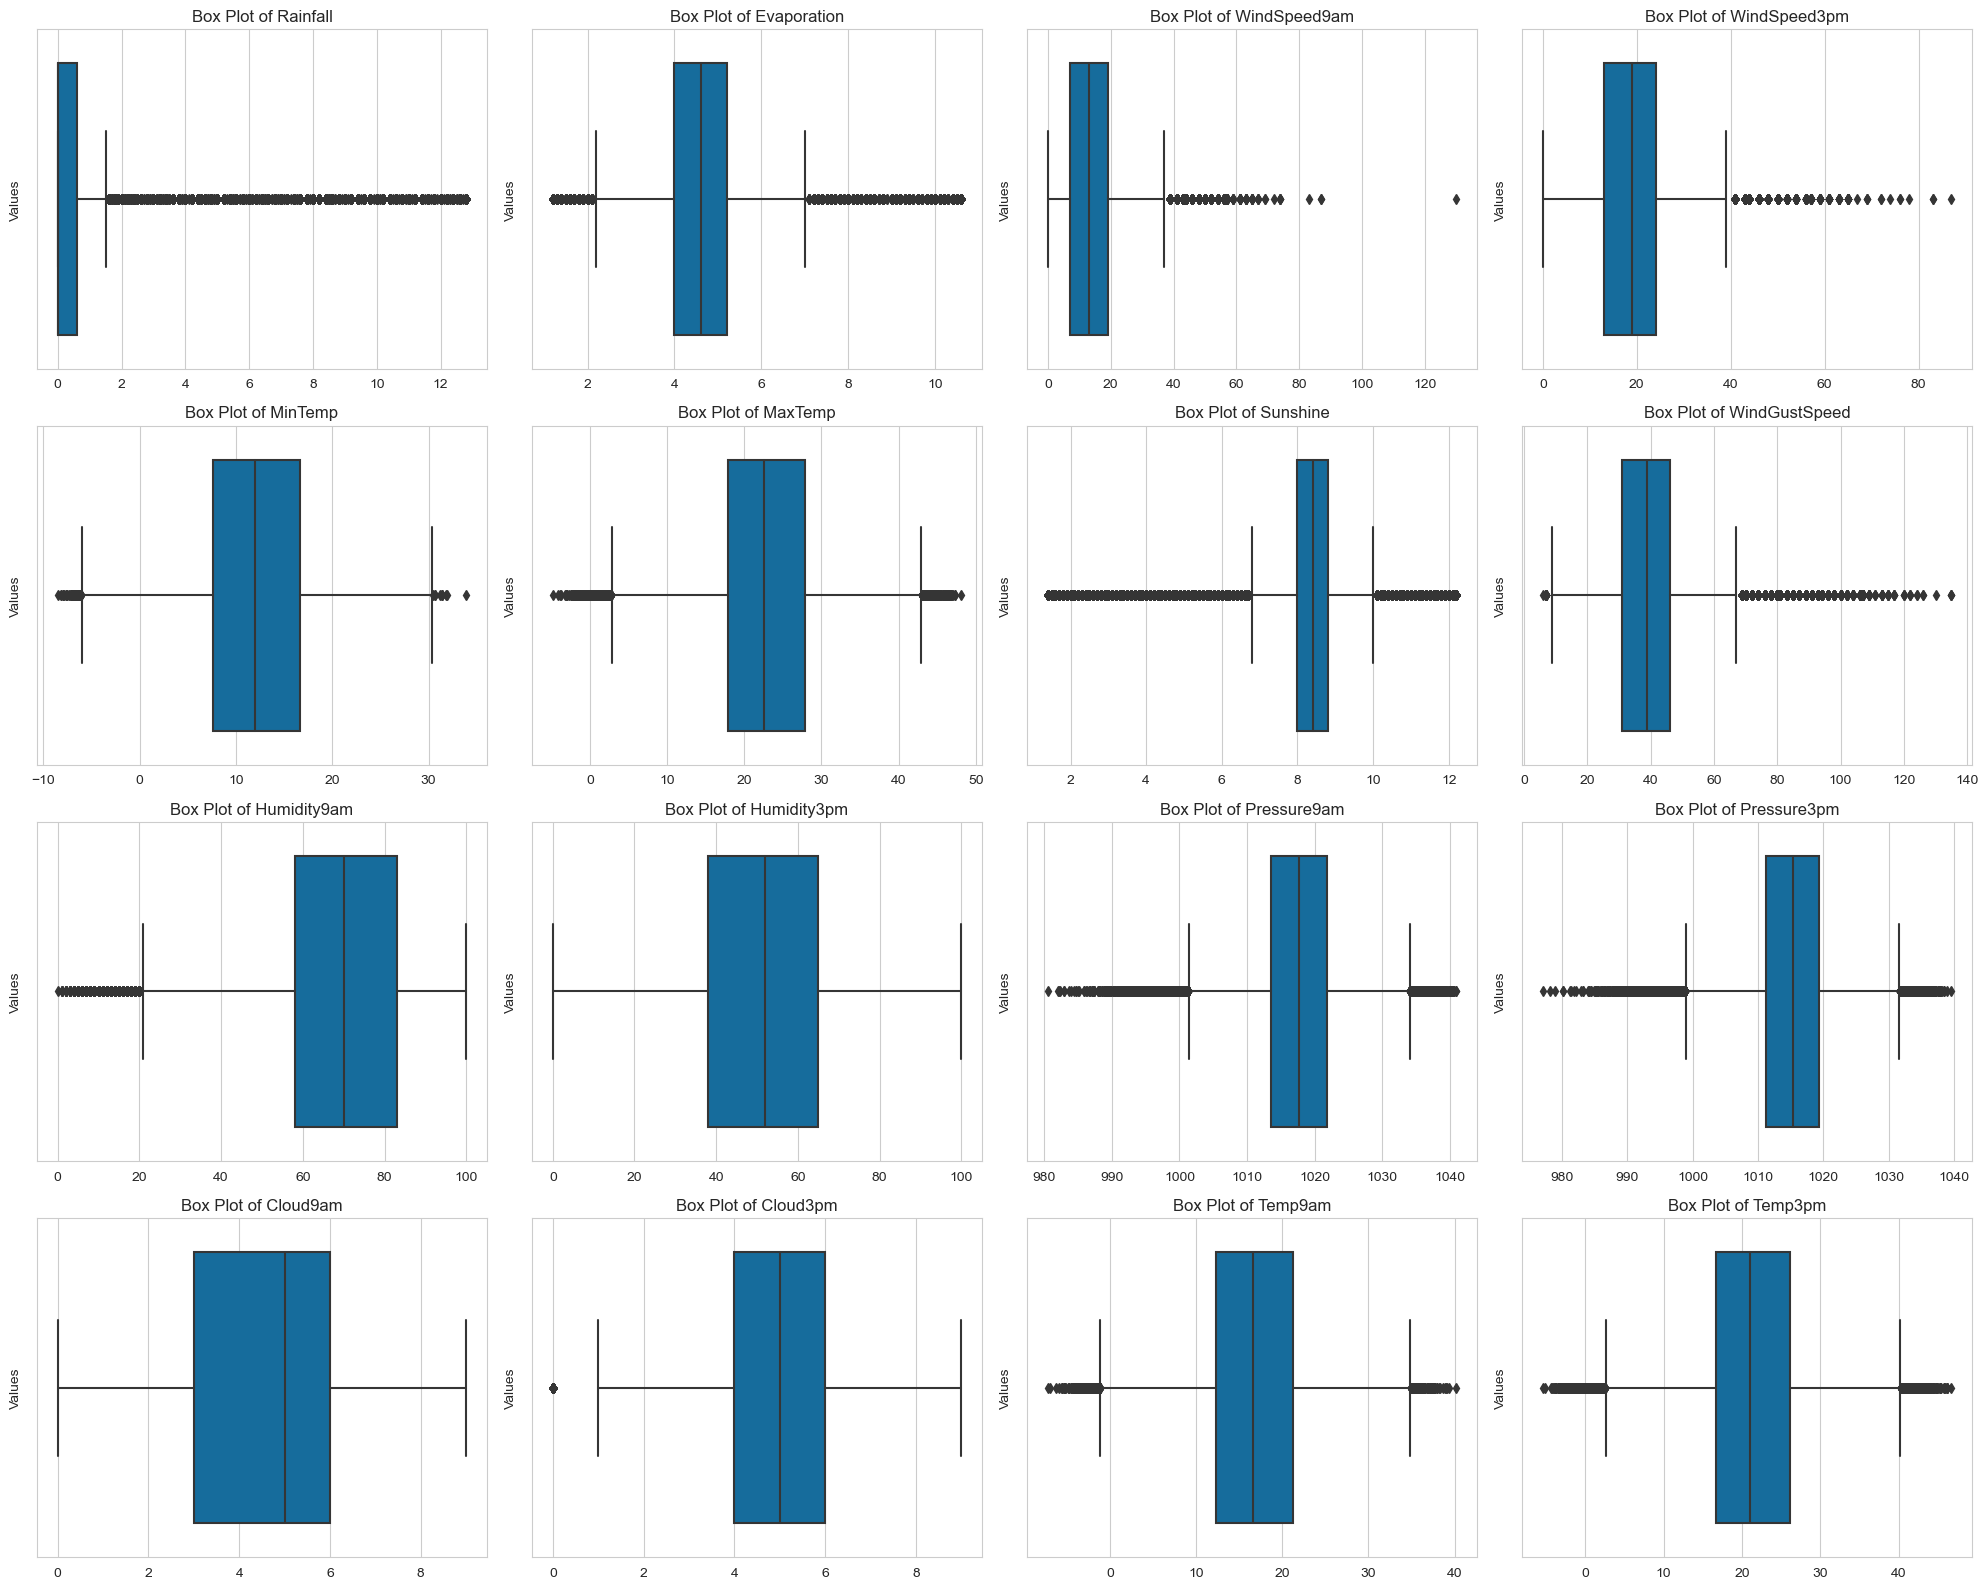

In [29]:
# Sample data loading and preparation part is omitted. Use df_rain_filtered DataFrame.
variables = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'MinTemp', 'MaxTemp', 'Sunshine', 'WindGustSpeed',
             'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

# Determine the number of rows/columns for the subplot grid
n_cols = 4  # Number of columns
n_rows = (len(variables) + n_cols - 1) // n_cols  # Ensures enough rows to accommodate all variables

# Create a large figure to hold all subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))  # Adjust the figure size accordingly

# Flatten axes array for easier iteration (if there's only one row, axes might not be a 2D array)
axes = axes.flatten()

# Plot each variable in a separate subplot
for ax, variable in zip(axes, variables):
    sns.boxplot(x=df_rain_filtered[variable], ax=ax)
    ax.set_title(f'Box Plot of {variable}')
    ax.set_xlabel('')
    ax.set_ylabel('Values')

# If there are any extra subplot areas, turn them off
for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()  # Adjust subplots to fit in the figure area
plt.show()

In [30]:
#creating dummy variables for categorical variables like 'WindGustDir', 'WindDir9am', 'WindDir3pm'
df_rain_filtered = pd.get_dummies(df_rain_filtered, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm','Location'])
df_rain_filtered.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          4.6       8.4           44.0   
1      7.4     25.1       0.0          4.6       8.4           44.0   
2     12.9     25.7       0.0          4.6       8.4           46.0   
3      9.2     28.0       0.0          4.6       8.4           24.0   
4     17.5     32.3       1.0          4.6       8.4           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       5.0     16.9     21.8          0             0   
1       1007.8       5.0       5.0     17.2     24.3          0             0   
2       1008.7       5.0       2.0     21.0     23.2          0             0   
3       1012.8       5.0       5.0     18.1     26.5          0             0   
4       1006.0       7.0       8.0     17.8     29.7          0             0   

   Year  Month  Day Year_Month  WindGustDir_E  WindGustDir_ENE  \
0  2008     12    1    2008-12              0                0   
1  2008     12    2    2008-12              0                0   
2  2008     12    3    2008-12              0                0   
3  2008     12    4    2008-12              0                0   
4  2008     12    5    2008-12              0                0   

   WindGustDir_ESE  WindGustDir_Missing  WindGustDir_N  WindGustDir_NE  \
0                0                    0              0               0   
1                0                    0              0               0   
2                0                    0              0               0   
3                0                    0              0               1   
4                0                    0              0               0   

   WindGustDir_NNE  WindGustDir_NNW  WindGustDir_NW  WindGustDir_S  \
0                0                0               0              0   
1                0                0               0              0   
2                0                0               0              0   
3                0                0               0              0   
4                0                0               0              0   

   WindGustDir_SE  WindGustDir_SSE  WindGustDir_SSW  WindGustDir_SW  \
0               0                0                0               0   
1               0                0                0               0   
2               0                0                0               0   
3               0                0                0               0   
4               0                0                0               0   

   WindGustDir_W  WindGustDir_WNW  WindGustDir_WSW  WindDir9am_E  \
0              1                0                0             0   
1              0                1                0             0   
2              0                0                1             0   
3              0                0                0             0   
4              1                0                0             0   

   WindDir9am_ENE  WindDir9am_ESE  WindDir9am_Missing  WindDir9am_N  \
0               0               0                   0             0   
1               0               0                   0             0   
2               0               0                   0             0   
3               0               0                   0             0   
4               1               0                   0             0   

   WindDir9am_NE  WindDir9am_NNE  WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  \
0              0               0               0 

In [31]:
df_rain_filtered.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140726 entries, 0 to 142303
Data columns (total 119 columns):
 #    Column                     Non-Null Count   Dtype  
---   ------                     --------------   -----  
 0    MinTemp                    140726 non-null  float64
 1    MaxTemp                    140726 non-null  float64
 2    Rainfall                   140726 non-null  float64
 3    Evaporation                140726 non-null  float64
 4    Sunshine                   140726 non-null  float64
 5    WindGustSpeed              140726 non-null  float64
 6    WindSpeed9am               140726 non-null  float64
 7    WindSpeed3pm               140726 non-null  float64
 8    Humidity9am                140726 non-null  float64
 9    Humidity3pm                140726 non-null  float64
 10   Pressure9am                140726 non-null  float64
 11   Pressure3pm                140726 non-null  float64
 12   Cloud9am                   140726 non-null  float64
 13   Cloud3pm    

In [32]:
# Create dummy variables for the 'Month' column
# Specify drop_first=True to avoid the dummy variable trap if linear models are used
month_dummies = pd.get_dummies(df_rain_filtered['Month'], prefix='Month', drop_first=False)

# Concatenate the dummy variables with the original DataFrame
df_rain_filtered = pd.concat([df_rain_filtered, month_dummies], axis=1)
df_rain_filtered.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          4.6       8.4           44.0   
1      7.4     25.1       0.0          4.6       8.4           44.0   
2     12.9     25.7       0.0          4.6       8.4           46.0   
3      9.2     28.0       0.0          4.6       8.4           24.0   
4     17.5     32.3       1.0          4.6       8.4           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
0       1007.1       8.0       5.0     16.9     21.8          0             0   
1       1007.8       5.0       5.0     17.2     24.3          0             0   
2       1008.7       5.0       2.0     21.0     23.2          0             0   
3       1012.8       5.0       5.0     18.1     26.5          0             0   
4       1006.0       7.0       8.0     17.8     29.7          0             0   

   Year  Month  Day Year_Month  WindGustDir_E  WindGustDir_ENE  \
0  2008     12    1    2008-12              0                0   
1  2008     12    2    2008-12              0                0   
2  2008     12    3    2008-12              0                0   
3  2008     12    4    2008-12              0                0   
4  2008     12    5    2008-12              0                0   

   WindGustDir_ESE  WindGustDir_Missing  WindGustDir_N  WindGustDir_NE  \
0                0                    0              0               0   
1                0                    0              0               0   
2                0                    0              0               0   
3                0                    0              0               1   
4                0                    0              0               0   

   WindGustDir_NNE  WindGustDir_NNW  WindGustDir_NW  WindGustDir_S  \
0                0                0               0              0   
1                0                0               0              0   
2                0                0               0              0   
3                0                0               0              0   
4                0                0               0              0   

   WindGustDir_SE  WindGustDir_SSE  WindGustDir_SSW  WindGustDir_SW  \
0               0                0                0               0   
1               0                0                0               0   
2               0                0                0               0   
3               0                0                0               0   
4               0                0                0               0   

   WindGustDir_W  WindGustDir_WNW  WindGustDir_WSW  WindDir9am_E  \
0              1                0                0             0   
1              0                1                0             0   
2              0                0                1             0   
3              0                0                0             0   
4              1                0                0             0   

   WindDir9am_ENE  WindDir9am_ESE  WindDir9am_Missing  WindDir9am_N  \
0               0               0                   0             0   
1               0               0                   0             0   
2               0               0                   0             0   
3               0               0                   0             0   
4               1               0                   0             0   

   WindDir9am_NE  WindDir9am_NNE  WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  \
0              0               0               0 

In [33]:
df_rain_filtered.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140726 entries, 0 to 142303
Data columns (total 131 columns):
 #    Column                     Non-Null Count   Dtype  
---   ------                     --------------   -----  
 0    MinTemp                    140726 non-null  float64
 1    MaxTemp                    140726 non-null  float64
 2    Rainfall                   140726 non-null  float64
 3    Evaporation                140726 non-null  float64
 4    Sunshine                   140726 non-null  float64
 5    WindGustSpeed              140726 non-null  float64
 6    WindSpeed9am               140726 non-null  float64
 7    WindSpeed3pm               140726 non-null  float64
 8    Humidity9am                140726 non-null  float64
 9    Humidity3pm                140726 non-null  float64
 10   Pressure9am                140726 non-null  float64
 11   Pressure3pm                140726 non-null  float64
 12   Cloud9am                   140726 non-null  float64
 13   Cloud3pm    

In [34]:
df_rain_filtered['RainTomorrow'].value_counts()

0    106290
1     31254
2      3182
Name: RainTomorrow, dtype: int64

In [35]:
# Convert all instances of '2' in the 'RainTomorrow' column to '1'
df_rain_filtered['RainTomorrow'] = df_rain_filtered['RainTomorrow'].replace(2, 1)
df_rain_filtered['RainTomorrow'].value_counts()

0    106290
1     34436
Name: RainTomorrow, dtype: int64

<div style="background-color:brown;  color:white; padding:20px">
<h2> 6.  HIERARCHIAL CLUSTERING TO IDENTIFY DISTRIBUTION OF NULL VALUES AMONG VARIABLES</h2>
</div>

* A hierarchial clustering is done to identify the dictribution of null values among variables

In [38]:
from sqlalchemy import create_engine

%matplotlib inline
pd.set_option('display.max_columns',500) 
plt.style.use('seaborn-colorblind') 
sns.set_style('whitegrid')

/var/folders/7w/g9brbv890v97g2cg68b46dsw0000gn/T/ipykernel_62914/2435421224.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [39]:
#Import train.csv  as df_crain
df_rain_cluster = pd.read_csv('/Users/reshmarajan/Desktop/DATA 6330/rain/weatherAUS.csv', index_col = None, header=0)
df_rain_cluster.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
0           W           44.0          W        WNW          20.0   
1         WNW           44.0        NNW        WSW           4.0   
2         WSW           46.0          W        WSW          19.0   
3          NE           24.0         SE          E          11.0   
4           W           41.0        ENE         NW           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
0          24.0         71.0         22.0       1007.7       1007.1       8.0   
1          22.0         44.0         25.0       1010.6       1007.8       NaN   
2          26.0         38.0         30.0       1007.6       1008.7       NaN   
3           9.0         45.0         16.0       1017.6       1012.8       NaN   
4          20.0         82.0         33.0       1010.8       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow  
0       NaN     16.9     21.8        No           No  
1       NaN     17.2     24.3        No           No  
2       2.0     21.0     23.2        No           No  
3       NaN     18.1     26.5        No           No  
4       8.0     17.8     29.7        No           No

In [41]:
# listed variables
variables = [
    'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
    'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
    'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
    'RainToday', 'RainTomorrow'
]

# Create a binary matrix where 1 indicates a missing value and 0 indicates a non-missing value
missing_data = df_rain_cluster[variables].isnull().astype(int)

In [42]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage matrix using Ward's method
Z = linkage(missing_data.T, 'ward')  # transpose to treat columns as observations

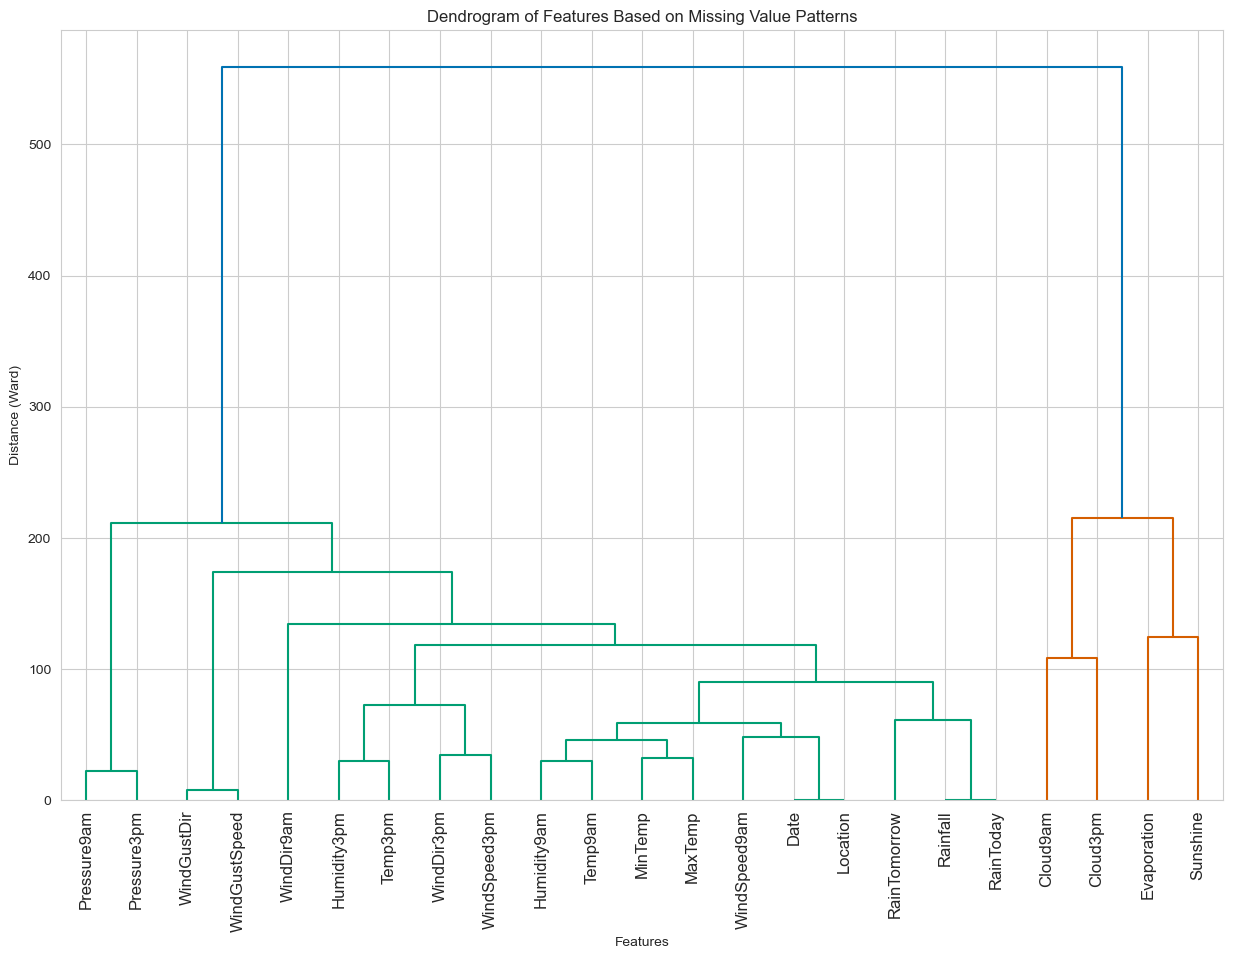

In [43]:
# Plotting the dendrogram
plt.figure(figsize=(15, 10))  # Set the size of the plot according to your needs
dendrogram(
    Z,
    labels=missing_data.columns,
    leaf_rotation=90,  # Rotates the feature names
    leaf_font_size=12  # Adjust font size for clarity
)
plt.title("Dendrogram of Features Based on Missing Value Patterns")
plt.xlabel("Features")
plt.ylabel("Distance (Ward)")
plt.show()

**Observations**:Two clusters can be seen ie; the green cluster and the red cluster. The variables found close to the base of the dendrogram are variables that have a smaller number of missing values. Variables such as WindGustDir, Pressure9am, Pressure3pm have fewer null values. Meanwhile, the Location, Rainfall etc. have zero null values. Alternatively, Variables in the red clusters such as Sunshine, Evaporation, Cloud3pm and Cloud 9am have higher number of null values.

<div style="background-color:brown;  color:white; padding:20px">
<h2> 7.  K-Mean CLUSTERING TO VISUALIZE RELATIONSHIP BETWEEN FEATURES IN THE DATASET
</h2>
</div>

*K-Mean Clustering is done to examine the patterns of features in relation to target variable ‘RainTomorrow’. The features considered are pressure variables and temperature variables since both pressure and temperature have more than one type of variables in the training dataset. This is done to understand how these variables are correlated and how they are associated with the occurrence of rainfall on the next day. 

In [44]:
# Convert 'RainTomorrow' from 'Yes'/'No' to 1/0
df_rain_cluster['RainTomorrow'] = df_rain_cluster['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Check the conversion to ensure it's done correctly
print(df_rain_cluster['RainTomorrow'].unique())

[ 0.  1. nan]


In [45]:
df_rain_cluster.dropna(subset=['RainTomorrow'], inplace=True)
# creating a subset from df_rain_cluster
df_subset = df_rain_cluster[['MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'RainTomorrow','Temp9am']].dropna()


In [46]:
#importing libraries for K-Means cluster
from sklearn.cluster import KMeans

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done


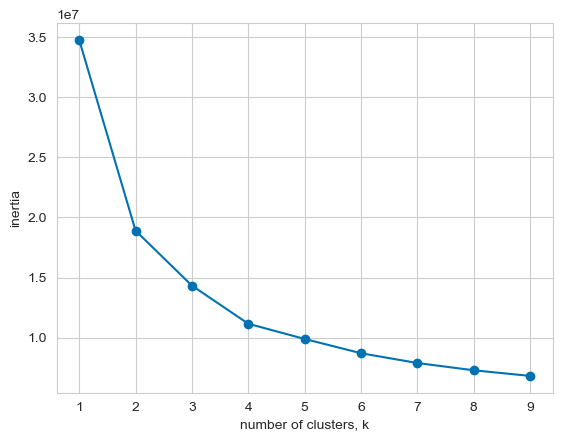

In [47]:
#Inertia Model for df_re_cluster with a range from to 1 to 10.
ks = range(1, 10) 
inertias = []
for k in ks:
# Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    # Fit model to samples
    model.fit(df_subset)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_) 
    print("iteration {} done".format(k))
# Plot ks vs inertias
plt.plot(ks, inertias, '-o') 
plt.xlabel('number of clusters, k') 
plt.ylabel('inertia') 
plt.xticks(ks)
plt.show()

In [48]:
# Initialize KMeans with a suitable number of clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_subset[['MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp3pm','Temp9am']])

# Assign the cluster labels back to the DataFrame
df_subset['Cluster'] = kmeans.labels_

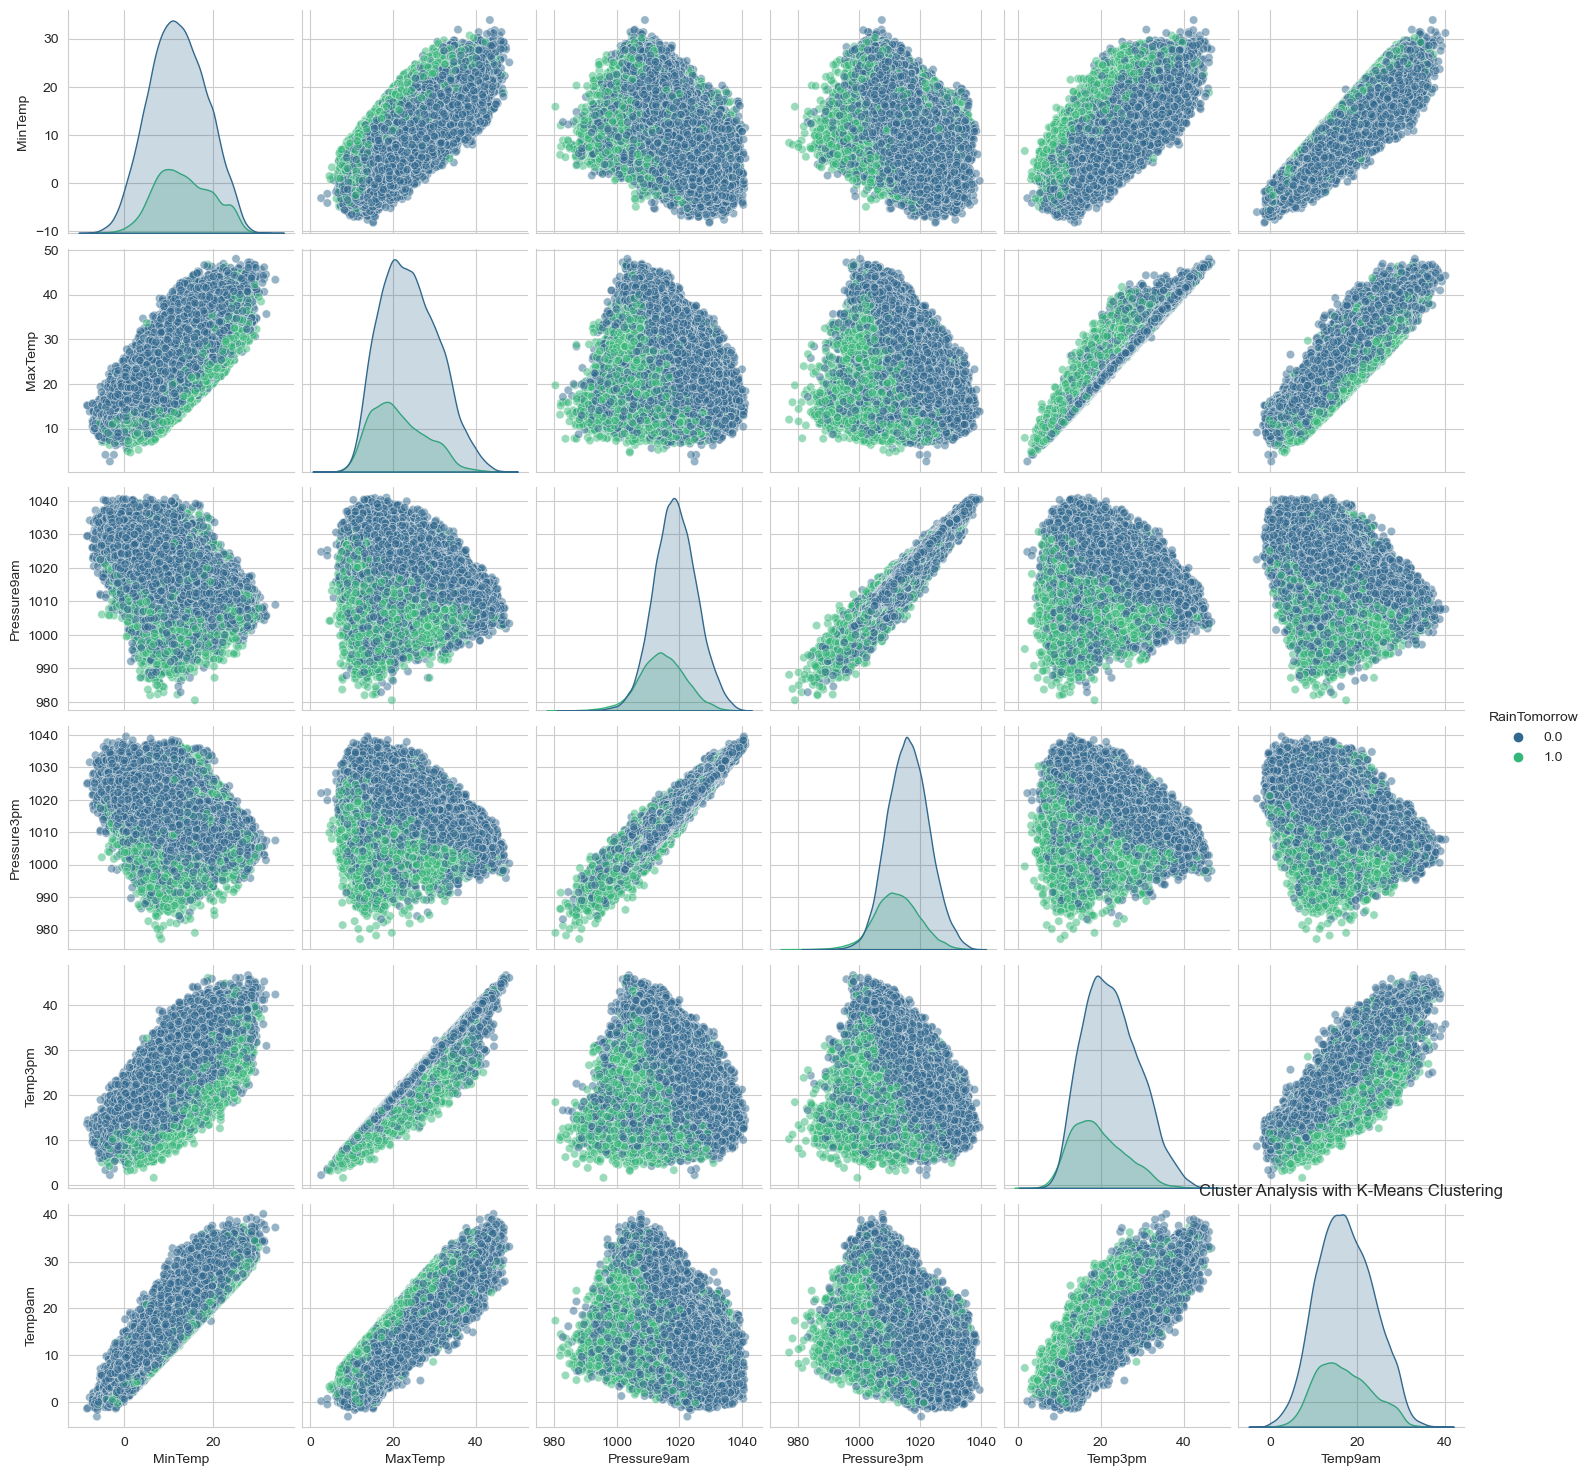

In [49]:
# Pairplot with hue based on 'RainTomorrow' and style by 'Cluster'
sns.pairplot(df_subset, vars=['MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp3pm','Temp9am'], hue='RainTomorrow', palette='viridis', plot_kws={'alpha': 0.5})
plt.title("Cluster Analysis with K-Means Clustering")
plt.show()

**Observations** Data points are colored distinctively to denote the occurrence and non-occurrence of rain next day (green color for occurrence of rain and blue color for non- occurrence).reveals the positive linear relationship of maximum temperature with temperature at 3pm. Also, pressure at 3pm and 9 am holds a strong positive correlation.Similarly, minimum temperature and temperature at 9 am positively associated. From the graph, it can be seen that the strong relationship between maximum temperature and temperature at 3pm are causing more rain occurrences on next day. Also, the strong relationship seen in Minimum Temperature and Temperature at 9 am is contributing to less rainfall occurrences on the next day. In the graph between pressure3pm and temp3pm, the green dots are concentrated at the low-pressure region which indicates that lower pressure value at afternoon will be associated with more chance of rainfall on next day. Likewise, Clear clustering of blue and green dots is visible in the graph which will be helpful to find the combination of factors that might lead to rainfall on the next day. The blue data points are speeded wider in graphs involving pressure variables.

<div style="background-color:brown;  color:white; padding:20px">
<h2> 8.  K-MEANS CLUSTERING TO IDENTIFY THE LOCATION SHARING SIMILAR WEATHER CONDITIONS</h2>
</div>

* The locations are divded into different clustering according to the similar materological factors. The recent one year data has been considered for this cluster (2016-2017).

In [50]:
from scipy.stats import chi2_contingency
data = pd.read_csv('weatherAUS.csv')

In [51]:
data['Date'] = pd.to_datetime(data['Date'])
# Filter data between July 2016 and June 2017
data = data[(data['Date'] >= '2016-07-01') & (data['Date'] <= '2017-06-30')]


In [52]:
# Drop irrelevant or redundant features
data = data.drop(['Date', 'Temp9am', 'Temp3pm', 'Pressure9am', 'WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], axis=1)




In [53]:
# Drop irrelevant or redundant features
data = data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17639 entries, 2680 to 145459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       17639 non-null  object 
 1   MinTemp        17481 non-null  float64
 2   MaxTemp        17495 non-null  float64
 3   Rainfall       17294 non-null  float64
 4   WindGustSpeed  16536 non-null  float64
 5   WindSpeed9am   17521 non-null  float64
 6   WindSpeed3pm   16854 non-null  float64
 7   Humidity9am    17360 non-null  float64
 8   Humidity3pm    16373 non-null  float64
 9   Pressure3pm    15809 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [54]:
# Assuming 'data' is your DataFrame
null_rows = data.isnull().any(axis=1).sum()

print(f"Number of rows with at least one null value: {null_rows}")


Number of rows with at least one null value: 3282


In [55]:
#dropping null values
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14357 entries, 2680 to 145458
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       14357 non-null  object 
 1   MinTemp        14357 non-null  float64
 2   MaxTemp        14357 non-null  float64
 3   Rainfall       14357 non-null  float64
 4   WindGustSpeed  14357 non-null  float64
 5   WindSpeed9am   14357 non-null  float64
 6   WindSpeed3pm   14357 non-null  float64
 7   Humidity9am    14357 non-null  float64
 8   Humidity3pm    14357 non-null  float64
 9   Pressure3pm    14357 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [56]:
# checking duplicates
duplicates = data.duplicated()

# To see the total number of duplicated rows
print(f"Number of duplicated rows: {duplicates.sum()}")


Number of duplicated rows: 0


In [57]:
# grouping the data by location
aggregated_data = data.groupby('Location').mean().reset_index()


In [58]:
print(aggregated_data)
print(f"Number of unique locations: {aggregated_data['Location'].nunique()}")


            Location    MinTemp    MaxTemp  Rainfall  WindGustSpeed  \
0           Adelaide  12.005367  22.679096  2.003955      33.389831   
1             Albury   9.513521  22.561690  1.837746      32.335211   
2       AliceSprings  12.961095  29.575216  0.811527      40.334294   
3      BadgerysCreek  11.258025  24.543210  1.855556      33.370370   
4           Ballarat   7.266667  18.098291  2.104274      44.720798   
5            Bendigo   8.928977  21.449432  2.023864      38.264205   
6           Brisbane  17.177457  27.123699  2.360694      27.086705   
7             Cairns  21.625157  29.724843  4.701887      38.940252   
8           Canberra   6.744638  21.074783  1.725797      40.681159   
9              Cobar  11.781148  24.405328  1.183607      34.356557   
10      CoffsHarbour  14.831014  24.336232  4.959420      40.484058   
11          Dartmoor   8.679330  19.465084  2.224581      37.245810   
12            Darwin  23.559944  32.480672  6.887955      39.025210   
13    

In [59]:
# Select columns to scale
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm']
data_to_scale = aggregated_data[features]


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# Convert the array back to a pandas DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=features)


In [61]:
# Assuming 'Location' is a non-scaled categorical feature want to keep
scaled_data['Location'] = aggregated_data['Location']


In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [63]:
# Example: Using previously scaled data assuming the DataFrame scaled_data is ready
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure3pm']


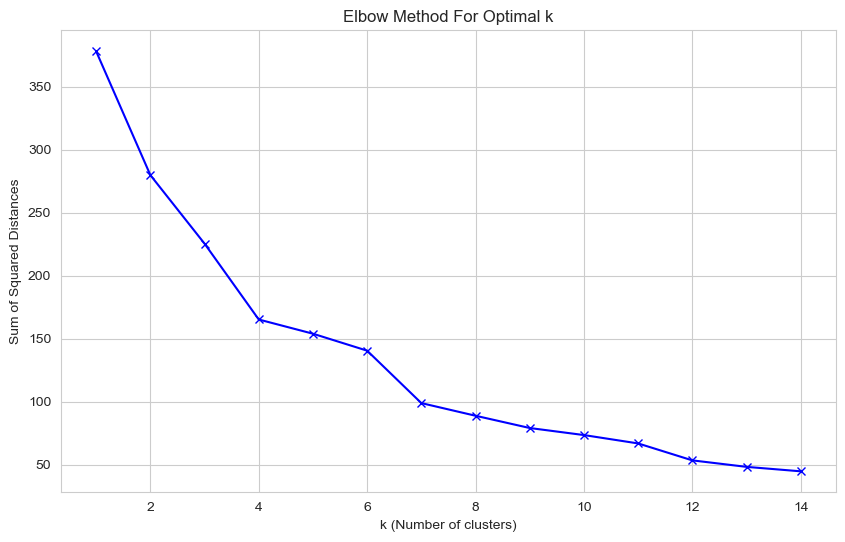

In [64]:
# Define the range of k values to try
k_values = range(1, 15)  # Adjust the range as necessary, typically 1 to 10 or 15

# List to store the sum of squared distances for each k
sum_of_squared_distances = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data[features])
    sum_of_squared_distances.append(kmeans.inertia_)  # Inertia: Sum of squared distances of samples to their closest cluster center
plt.figure(figsize=(10, 6))
plt.plot(k_values, sum_of_squared_distances, 'bx-')
plt.xlabel('k (Number of clusters)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [65]:
# =the elbow is at k = 4
optimal_k = 4
final_kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(scaled_data[features])
scaled_data['Cluster'] = final_kmeans.labels_

# Optionally, check cluster assignments
print(scaled_data[['Location', 'Cluster']].head())


        Location  Cluster
0       Adelaide        1
1         Albury        1
2   AliceSprings        3
3  BadgerysCreek        1
4       Ballarat        0


In [66]:
# Define colors for each cluster explicitly
cluster_colors = {
    0: 'green',  # Cluster 0
    1: 'blue',   # Cluster 1
    2: 'red',    # Cluster 2
    3: 'orange'  # Cluster 3
}

In [70]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data[features])
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Combine with the location and cluster information
principal_df['Location'] = scaled_data['Location']
principal_df['Cluster'] = scaled_data['Cluster']


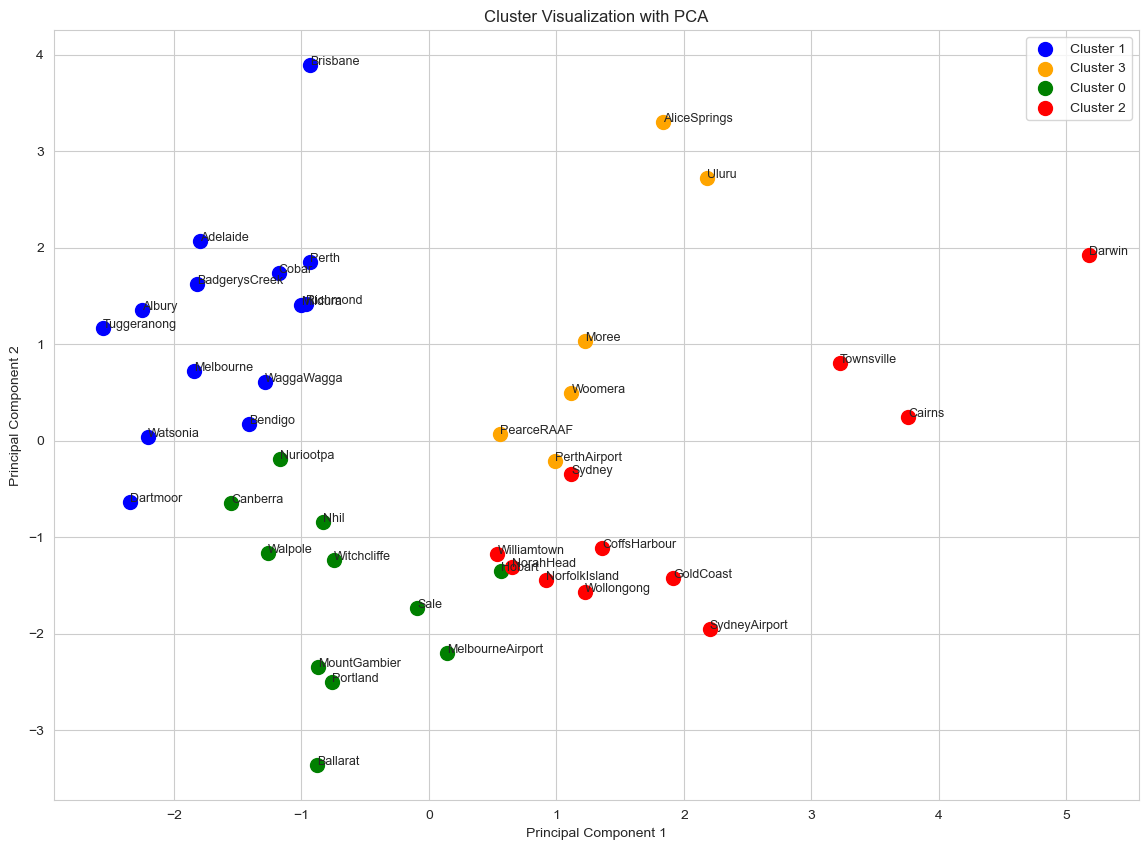

In [71]:
import matplotlib.pyplot as plt

# Assuming 'principal_df' is already created with 'PC1', 'PC2', 'Location', and 'Cluster'
plt.figure(figsize=(14, 10))

for cluster in principal_df['Cluster'].unique():
    cluster_data = principal_df[principal_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], s=100, color=cluster_colors[cluster], label=f'Cluster {cluster}')
    for idx, row in cluster_data.iterrows():
        plt.text(row['PC1'], row['PC2'], row['Location'], fontsize=9)

plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
#  existing DataFrame
scaled_data = pd.DataFrame({
    'Location':["Adelaide", "Albury", "AliceSprings", "BadgerysCreek", "Ballarat", "Bendigo", "Brisbane", "Cairns", "Canberra", "Cobar", "CoffsHarbour", "Dartmoor", "Darwin", "GoldCoast", "Hobart", "Melbourne", "MelbourneAirport", "Mildura", "Moree", "MountGambier", "Nhil", "NorahHead", "NorfolkIsland", "Nuriootpa", "PearceRAAF", "Perth", "PerthAirport", "Portland", "Richmond", "Sale", "Sydney", "SydneyAirport", "Townsville", "Tuggeranong", "Uluru", "WaggaWagga", "Walpole", "Watsonia", "Williamtown", "Witchcliffe", "Wollongong", "Woomera"
],
    'Cluster': [1, 1, 3, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 0, 1, 0, 1, 3, 0, 0, 2, 2, 0, 3, 1, 3, 0, 1, 0, 2, 2, 2, 1, 3, 1, 0, 1, 2, 0, 2, 3
]
})

# Dictionary with the latitude and longitude
coordinates = {
    'Adelaide': (-34.9285, 138.6007),
    'Albury': (-36.0751, 146.9095),
    'AliceSprings': (-23.6980, 133.8807),
    'BadgerysCreek': (-33.8751, 150.7634),
    'Ballarat': (-37.5622, 143.8503),
    'Bendigo': (-36.7596, 144.2786),
    'Brisbane': (-27.4705, 153.0260),
    'Cairns': (-16.9203, 145.7710),
    'Canberra': (-35.2802, 149.1310),
    'Cobar': (-31.4978, 145.8363),
    'CoffsHarbour': (-30.2962, 153.1139),
    'Dartmoor': (-37.9224, 141.2754),
    'Darwin': (-12.4637, 130.8444),
    'GoldCoast': (-28.0167, 153.4000),
    'Hobart': (-42.8826, 147.3257),
    'Melbourne': (-37.8136, 144.9631),
    'MelbourneAirport': (-37.6700, 144.8494),
    'Mildura': (-34.2068, 142.1367),
    'Moree': (-29.4653, 149.8416),
    'MountGambier': (-37.8284, 140.7807),
    'Nhil': (-36.3328, 141.6503),
    'NorahHead': (-33.2815, 151.5791),
    'NorfolkIsland': (-29.0408, 167.9547),
    'Nuriootpa': (-34.4730, 138.9957),
    'PearceRAAF': (-31.6676, 116.0292),
    'Perth': (-31.9514, 115.8617),
    'PerthAirport': (-31.9385, 115.9672),
    'Portland': (-38.352611, 141.606294),  # Converted to decimal format
    'Richmond': (-37.8230, 144.9980),
    'Sale': (-38.1000, 147.0670),
    'Sydney': (-33.8688, 151.2093),
    'SydneyAirport': (-33.9400, 151.1754),
    'Townsville': (-19.2590, 146.8169),
    'Tuggeranong': (-35.4180, 149.0694),
    'Uluru': (-25.3444, 131.0369),
    'WaggaWagga': (-35.1026, 147.3655),
    'Walpole': (-34.9762, 116.7313),
    'Watsonia': (-37.7101, 145.0828),
    'Williamtown': (-32.8115, 151.8443),
    'Wollongong': (-34.4248, 150.8931),
    'Woomera': (-31.1988, 136.8251)
}


# Split the coordinates dictionary into two dictionaries for latitude and longitude
latitudes = {key: value[0] for key, value in coordinates.items()}
longitudes = {key: value[1] for key, value in coordinates.items()}

# Map the latitude and longitude to the DataFrame
scaled_data['Latitude'] = scaled_data['Location'].map(latitudes)
scaled_data['Longitude'] = scaled_data['Location'].map(longitudes)

# Now scaled_data has two new columns for Latitude and Longitude


In [73]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


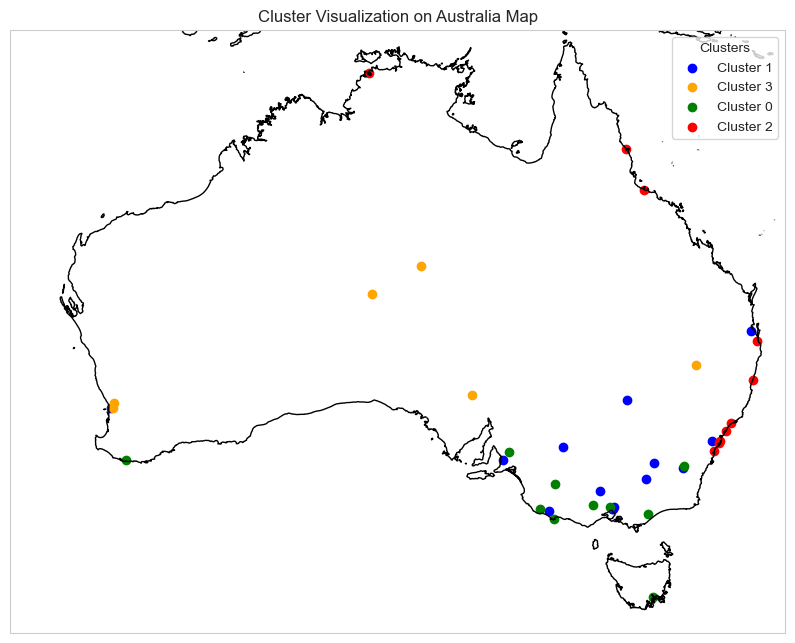

In [74]:
# Projecting the clusters on to Autralia Map
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Set up the plot with cartopy
fig, ax = plt.subplots(figsize=(10, 15), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([110, 155, -45, -10], crs=ccrs.PlateCarree())  # Set the extent to cover Australia

# Add geographic features
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Scatter plot for clusters using defined colors
for cluster in scaled_data['Cluster'].unique():
    cluster_data = scaled_data[scaled_data['Cluster'] == cluster]
    ax.scatter(cluster_data['Longitude'], cluster_data['Latitude'], color=cluster_colors[cluster], transform=ccrs.Geodetic(), label=f'Cluster {cluster}')

# Add legend and show the plot
plt.legend(title="Clusters")
plt.title('Cluster Visualization on Australia Map')
plt.show()


* Locations in Cluster 2 is situated at the shore line. Also, locations in cluster 3 is situated at central part of Australia.  Cluster 1 is a bit away from shoreline.

<div style="background-color:green;  color:white; padding:20px">
<h2> 9.  MODELLING - LOGISTIC REGRESSION</h2>
</div>

In [75]:
#Create the X dataset by dropping the features/targets not needed
X = df_rain_filtered.drop(['RainTomorrow','Year_Month'], axis=1)
#Create the target 
y = df_rain_filtered['RainTomorrow']

In [76]:
# view the X dataset
X.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          4.6       8.4           44.0   
1      7.4     25.1       0.0          4.6       8.4           44.0   
2     12.9     25.7       0.0          4.6       8.4           46.0   
3      9.2     28.0       0.0          4.6       8.4           24.0   
4     17.5     32.3       1.0          4.6       8.4           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Year  Month  \
0       1007.1       8.0       5.0     16.9     21.8          0  2008     12   
1       1007.8       5.0       5.0     17.2     24.3          0  2008     12   
2       1008.7       5.0       2.0     21.0     23.2          0  2008     12   
3       1012.8       5.0       5.0     18.1     26.5          0  2008     12   
4       1006.0       7.0       8.0     17.8     29.7          0  2008     12   

   Day  WindGustDir_E  WindGustDir_ENE  WindGustDir_ESE  WindGustDir_Missing  \
0    1              0                0                0                    0   
1    2              0                0                0                    0   
2    3              0                0                0                    0   
3    4              0                0                0                    0   
4    5              0                0                0                    0   

   WindGustDir_N  WindGustDir_NE  WindGustDir_NNE  WindGustDir_NNW  \
0              0               0                0                0   
1              0               0                0                0   
2              0               0                0                0   
3              0               1                0                0   
4              0               0                0                0   

   WindGustDir_NW  WindGustDir_S  WindGustDir_SE  WindGustDir_SSE  \
0               0              0               0                0   
1               0              0               0                0   
2               0              0               0                0   
3               0              0               0                0   
4               0              0               0                0   

   WindGustDir_SSW  WindGustDir_SW  WindGustDir_W  WindGustDir_WNW  \
0                0               0              1                0   
1                0               0              0                1   
2                0               0              0                0   
3                0               0              0                0   
4                0               0              1                0   

   WindGustDir_WSW  WindDir9am_E  WindDir9am_ENE  WindDir9am_ESE  \
0                0             0               0               0   
1                0             0               0               0   
2                1             0               0               0   
3                0             0               0               0   
4                0             0               1               0   

   WindDir9am_Missing  WindDir9am_N  WindDir9am_NE  WindDir9am_NNE  \
0                   0             0              0               0   
1                   0             0              0               0   
2                   0             0              0               0   
3                   0             0              0               0   
4                   0             0              0               0   

   WindDir9am_NNW  WindDir9am_NW  WindDir9am_S  WindDir9am_SE  WindDir9am_SSE  \
0            

### Create the training and test datasets 


In [77]:
# import libaries for splitting the data and standaradizing
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

sc = preprocessing.StandardScaler()

In [78]:
#Split the raw data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Create the scaled versions of X_training and X_test datasets

In [79]:
#standardize the data

sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)


#set the training data and test data to be the scaled data
X_train = X_train_sc
X_test = X_test_sc

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# Run a Logistic Regression 

scale = [(X_train, X_test, 'Raw'), (X_train_sc, X_test_sc, 'StdScale')]

model = LogisticRegression(random_state=21)

#Creates a DataFrame for aggregattion of results
df_results_scaled = pd.DataFrame(y_test).reset_index()

for vartrain, vartest, name in scale:
    model.fit(vartrain, y_train)
    score = model.score(vartest, y_test)
    
    model_pred = model.predict(vartest)
    df_model_pred = pd.DataFrame(model_pred, columns=[name])
    
    df_results_scaled = pd.concat([df_results_scaled, df_model_pred], axis=1)
    
    print('----------------')
    print('Results: ' + name)
    display(round(score, 6))
    print(confusion_matrix(y_test, model_pred))

df_results_scaled.sample(10, random_state=102)

----------------
Results: Raw


/Users/reshmarajan/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.822919

[[29890  1953]
 [ 5523  4852]]
----------------
Results: StdScale


0.839358

[[29803  2040]
 [ 4742  5633]]


index  RainTomorrow  Raw  StdScale
12877  114746             0    0         0
21410   10697             0    0         0
181     75199             0    0         0
25846   87854             0    0         0
5943    54849             1    1         0
2318    66226             1    0         0
34201   33047             0    0         0
7461   102167             1    1         1
16777   65281             0    0         0
16864   83160             0    0         0

* decided to move forawrd with stand scaled data

In [83]:
#Create a Defined Function for Building a Model
def modeltraintest(vartrain, vartest, y_train, y_test, model):

    #Fit the model
    model.fit(vartrain, y_train)

    #Predict with the model
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)

    
    #Assess with the model
    score = model.score(vartest, y_test)

    print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
    print(round(score, 6))
    print("")


    print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
    print(confusion_matrix(y_test, model_pred))
    print("")


    print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
    print(classification_report(y_test, model_pred))
    print('')


    print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
    print('')
    y_pred_prob = model.predict_proba(vartest)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0, 1], [0, 1],'k--')
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.show();

    # calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')


    print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
    print('')
    cv_scores = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='accuracy')
    print('CV Accuracy Scores:')
    print(cv_scores)
    print('')
    cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='roc_auc')
    print('CV ROC AUC:')
    print(cv_rocauc)

    print('')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

In [84]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
#Declare the variables for a model and apply to the function
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(random_state=21)

modeltraintest(vartrain, vartest, y_train, y_test, model)

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.839358

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[29803  2040]
 [ 4742  5633]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX


NameError: name 'classification_report' is not defined

In [85]:
#Create a Short Version of a Defined Function for Building a Model
def shorttraintest(vartrain, vartest, y_train, y_test, model):

    #Fit the model
    model.fit(vartrain, y_train)

    #Predict with the model
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)


    print('Confusion Matrix:')
    print(confusion_matrix(y_test, model_pred))
    print("")

    #Assess with the model
    score = model.score(vartest, y_test)
    score_format = 'Accuracy Score: {0:.4f}'.format(score)
    print(score_format)

    recall = recall_score(y_test, model_pred)
    recall_format = 'Recall Score: {0:.4f}'.format(recall)
    print(recall_format)
    
    precision = precision_score(y_test, model_pred)
    precision_format = 'Precision Score: {0:.4f}'.format(precision)
    print(precision_format)
    
    # calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')

In [86]:
from sklearn.metrics import precision_score, recall_score
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc
model = LogisticRegression(random_state=21)

shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[29803  2040]
 [ 4742  5633]]

Accuracy Score: 0.8394
Recall Score: 0.5429
Precision Score: 0.7341
ROC AUC Score: 0.8697



### Grid Search

In [87]:
#Code Block 62

from sklearn.model_selection import RandomizedSearchCV

grid={"C":[0.001, 0.01, 0.1, 1, 5, 10], "penalty":["l1","l2"], 
     "class_weight": [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}], "solver":['lbfgs', 'liblinear']}
logreg=LogisticRegression(random_state=21)
logreg_cv=RandomizedSearchCV(logreg,grid,cv=10)
logreg_cv.fit(vartrain,y_train)

print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


/Users/reshmarajan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/reshmarajan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/reshmarajan/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/reshmarajan/anaconda3/lib/python3.11/site-packages/sklearn

tuned hyperparameters :(best parameters)  {'solver': 'liblinear', 'penalty': 'l1', 'class_weight': {0: 1, 1: 1.5}, 'C': 10}
accuracy : 0.8318410653766503


### Final Model after hyperparameter tuning or Grid Search


In [88]:
%time

#Code Block 64

#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(random_state=21, C=0.01, class_weight = None, penalty = 'l2', solver = 'lbfgs')


shorttraintest(vartrain, vartest, y_train, y_test, model)

CPU times: user 5 µs, sys: 7 µs, total: 12 µs
Wall time: 495 µs
Confusion Matrix:
[[29844  1999]
 [ 4789  5586]]

Accuracy Score: 0.8392
Recall Score: 0.5384
Precision Score: 0.7365
ROC AUC Score: 0.8696



### Decision Model

In [89]:
cw = [None, {0:1, 1:1}, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:2.5}, {0:1, 1:3}, {0:1, 1:4}, {0:1, 1:4.5},{0:1, 1:5}, {0:1, 1:5.5},{0:1, 1:10}, {0:1, 1:100}]

vartrain = X_train_sc
vartest = X_test_sc

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    model = LogisticRegression(random_state=21, C=0.01, penalty = 'l2', solver = 'lbfgs', class_weight=varcw)
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)


          

----------------------
Model with Class Weight: None

Confusion Matrix:
[[29844  1999]
 [ 4789  5586]]

Accuracy Score: 0.8392
Recall Score: 0.5384
Precision Score: 0.7365
ROC AUC Score: 0.8696

----------------------
Model with Class Weight: {0: 1, 1: 1}

Confusion Matrix:
[[29844  1999]
 [ 4789  5586]]

Accuracy Score: 0.8392
Recall Score: 0.5384
Precision Score: 0.7365
ROC AUC Score: 0.8696

----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[25359  6484]
 [ 2300  8075]]

Accuracy Score: 0.7919
Recall Score: 0.7783
Precision Score: 0.5546
ROC AUC Score: 0.8702

----------------------
Model with Class Weight: {0: 1, 1: 1.5}

Confusion Matrix:
[[28637  3206]
 [ 3815  6560]]

Accuracy Score: 0.8337
Recall Score: 0.6323
Precision Score: 0.6717
ROC AUC Score: 0.8699

----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[27492  4351]
 [ 3181  7194]]

Accuracy Score: 0.8216
Recall Score: 0.6934
Precision Score: 0.6231
ROC AUC Score: 0.8

In [90]:
# Decision Logistic Regression Model based on Analyzing the Precision/Recall
%time

#Code Block 65

#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(random_state=21, C=0.01, class_weight = {0: 1, 1: 2}, penalty = 'l2', solver = 'lbfgs')


shorttraintest(vartrain, vartest, y_train, y_test, model)

CPU times: user 14 µs, sys: 75 µs, total: 89 µs
Wall time: 24.1 µs
Confusion Matrix:
[[27492  4351]
 [ 3181  7194]]

Accuracy Score: 0.8216
Recall Score: 0.6934
Precision Score: 0.6231
ROC AUC Score: 0.8701



### Optimal Model:

Confusion Matrix:
[[29844  1999]
 [ 4789  5586]]

Accuracy Score: 0.8392
Recall Score: 0.5384
Precision Score: 0.7365
ROC AUC Score: 0.8696



Pred_OPT_Log
0             0
1             0

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.839216

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[29844  1999]
 [ 4789  5586]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     31843
           1       0.74      0.54      0.62     10375

    accuracy                           0.84     42218
   macro avg       0.80      0.74      0.76     42218
weighted avg       0.83      0.84      0.83     42218


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



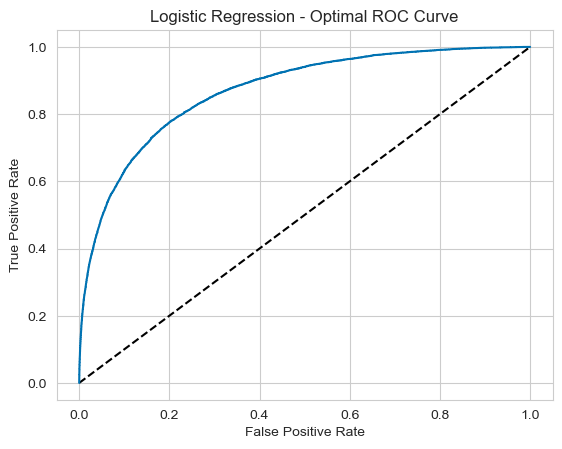

ROC AUC Score: 0.8696

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.83397625 0.83742767 0.8392549  0.83635348 0.83660728]

CV ROC AUC:
[0.86303594 0.86951126 0.87138774 0.86662914 0.86791931]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [92]:
from sklearn.metrics import classification_report
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(C=0.01, class_weight = None, penalty = 'l2', solver = 'lbfgs')

shorttraintest(vartrain, vartest, y_train, y_test, model)
vartrain = X_train_sc
vartest = X_test_sc

model.fit(vartrain, y_train)

#Predict with the model
model_pred = model.predict(vartest)
model_prob = model.predict_proba(vartest)
df_model_pred = pd.DataFrame(model_pred)
df_model_pred = df_model_pred.rename(columns = {0:'Pred_OPT_Log'})

df_model_prob = pd.DataFrame(model_prob)
df_model_prob = df_model_prob.rename(columns = {0:'Prob_OPT_No_Rain', 1:'Prob_OPT_Rain'})

display(df_model_pred.head(2))
df_model_prob.head(2)

#Assess with the model
score = model.score(vartest, y_test)

print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
print(round(score, 6))
print("")


print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
cm_opt = confusion_matrix(y_test, model_pred)
print(cm_opt)
print("")


print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
print(classification_report(y_test, model_pred))
print('')


print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
print('')
y_pred_prob = model.predict_proba(vartest)[:,1]

fpr_opt, tpr_opt, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr_opt, tpr_opt, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - Optimal ROC Curve')
plt.show();

# calculate roc curve
y_pred_prob = model.predict_proba(vartest)[:,1]

roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
print(roc_auc_format)
print('')


print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
print('')
cv_scores = cross_val_score(model, vartrain, y_train, cv=5,
scoring='accuracy')
print('CV Accuracy Scores:')
print(cv_scores)
print('')
cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5,
scoring='roc_auc')
print('CV ROC AUC:')
print(cv_rocauc)

print('')
print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

In [93]:
#Concatenating dataframes

df_model_results = pd.concat([df_results_scaled, df_model_pred, df_model_prob], axis=1)
df_model_results.sample(10, random_state=112)
df_model_results = df_model_results.drop(['Raw','StdScale'],axis=1)
df_model_results

index  RainTomorrow  Pred_OPT_Log  Prob_OPT_No_Rain  Prob_OPT_Rain
0       11616             0             0          0.809737       0.190263
1      141214             0             0          0.973354       0.026646
2       89629             0             0          0.910327       0.089673
3       50831             0             0          0.867774       0.132226
4      125210             0             0          0.958370       0.041630
...       ...           ...           ...               ...            ...
42213   99014             0             0          0.907387       0.092613
42214  105249             0             0          0.869124       0.130876
42215    8907             0             0          0.535880       0.464120
42216   45665             1             0          0.757923       0.242077
42217   57222             0             0          0.949200       0.050800

[42218 rows x 5 columns]

### DECISION Model based on precision and recall

Accuracy Score: 0.8216
Recall Score: 0.6934
Precision Score: 0.6231

[[27492  4351]
 [ 3181  7194]]


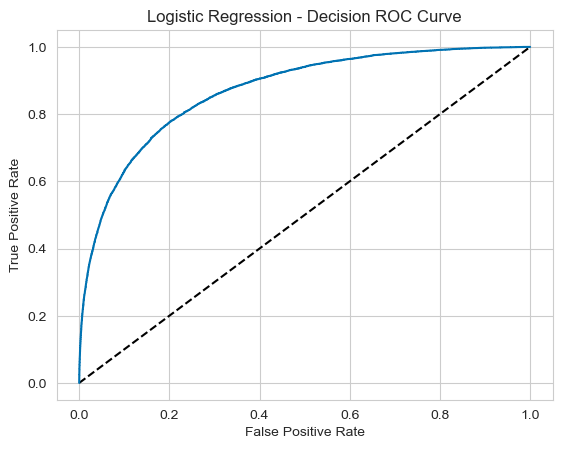

In [94]:
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model = LogisticRegression(random_state=21, C=0.01, class_weight = {0:1, 1:2}, penalty = 'l2', solver = 'lbfgs')
#Assess with the model
model.fit(vartrain, y_train)

#Predict with the model
model_pred = model.predict(vartest)
model_prob = model.predict_proba(vartest)
df_model_pred = pd.DataFrame(model_pred)
df_model_pred = df_model_pred.rename(columns = {0:'Pred_DEC_Log'})

df_model_prob = pd.DataFrame(model_prob)
df_model_prob = df_model_prob.rename(columns = {0:'Prob_DEC_No_Rain_Tomorrow', 1:'Prob_DEC_Rain_Tomorrow'})


score = model.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)
print("")
cm_dec = confusion_matrix(y_test, model_pred)
print(cm_dec)

fpr_dec, tpr_dec, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr_dec, tpr_dec, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression - Decision ROC Curve')
plt.show();


[Text(0, 0.5, 'No_Rain_Tomorrow'), Text(0, 1.5, 'Rain_Tomorrow')]

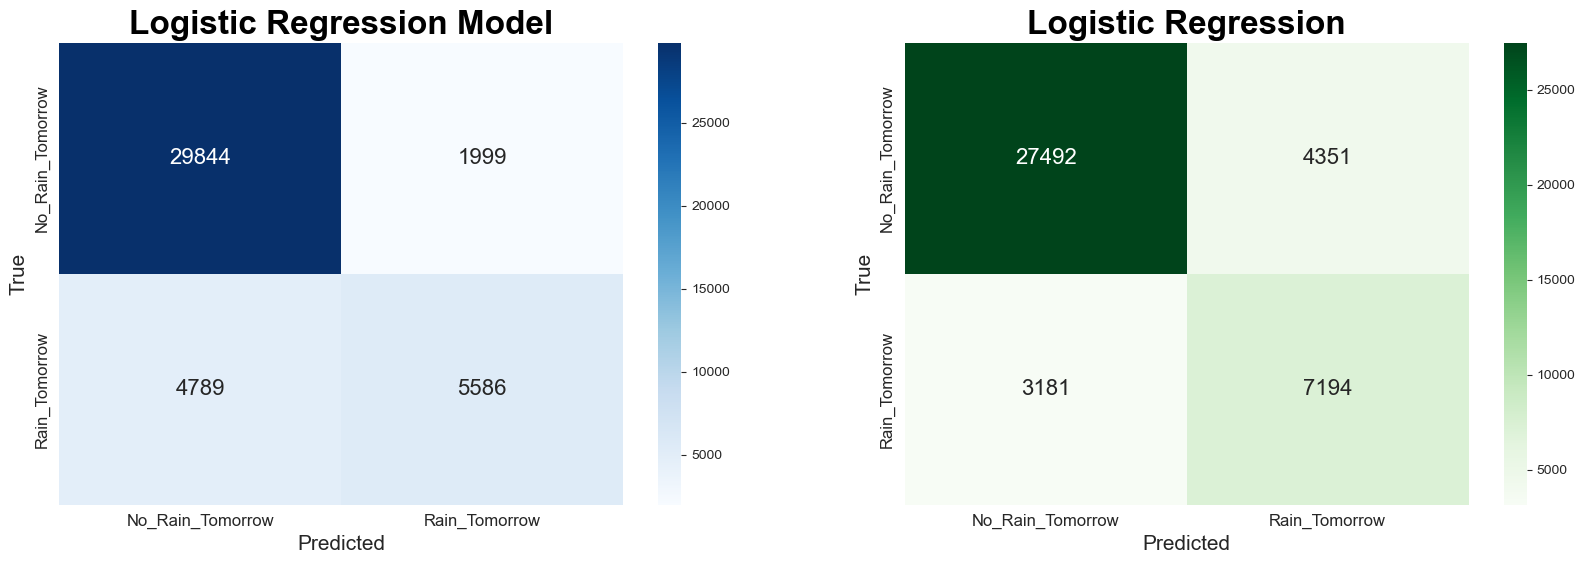

In [95]:
# confusion matrix for optimal and decision model
plt.figure(figsize=(20,6))


plt.subplot(121)


plt.title('Logistic Regression Model', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_opt, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['No_Rain_Tomorrow', 'Rain_Tomorrow'], fontsize=12)
chart.yaxis.set_ticklabels(['No_Rain_Tomorrow', 'Rain_Tomorrow'], fontsize=12, va='center')


plt.subplot(122)
plt.title('Logistic Regression', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dec, annot=True, cmap="Greens", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['No_Rain_Tomorrow', 'Rain_Tomorrow'], fontsize=12)
chart.yaxis.set_ticklabels(['No_Rain_Tomorrow', 'Rain_Tomorrow'], fontsize=12, va='center')

After hypertuning, the precision and recall has been improved (right side confusion matrix)

* 27,492: true negatives - days correctly predicted as not having rain tomorrow. 
* 4,351: false positives - days incorrectly predicted to have rain tomorrow. 
* 3,181: false negatives - days that were incorrectly predicted as not having rain tomorrow when it actually did. 
* 7,194: true positives -  days correctly predicted to have rain tomorrow. 
* Accuracy:82.17% of the model’s prediction are correct when deciding if it will rain the following day 
* Precision:Model correctly identified 62.33% of the days where the rain occurred  when it predicted the rain next day
* Recall: Model predicts rain 69.35% of the time it is correct 


<div style="background-color:#8e4585; color:white; padding:20px">
<h2> 10. RANDOM FOREST MODELLING FOR RAIN PREDICTION </h2>
</div>

In [105]:
#Import functions for Decision Tree
from sklearn.ensemble import RandomForestClassifier

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.849969

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[30402  1441]
 [ 4893  5482]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.86      0.95      0.91     31843
           1       0.79      0.53      0.63     10375

    accuracy                           0.85     42218
   macro avg       0.83      0.74      0.77     42218
weighted avg       0.84      0.85      0.84     42218


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



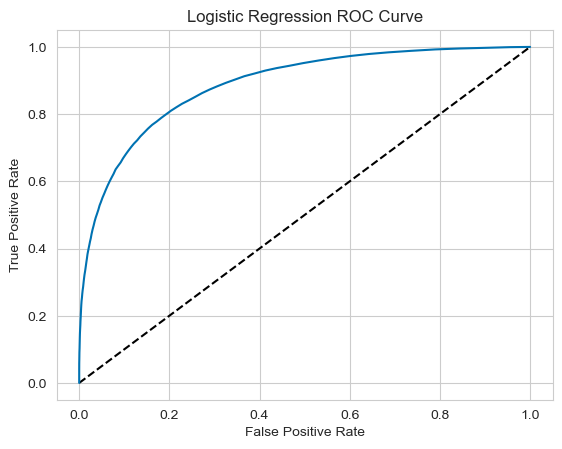

ROC AUC Score: 0.8873

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.84605624 0.84874632 0.85052279 0.84975382 0.84934775]

CV ROC AUC:
[0.88057046 0.88436769 0.88811474 0.88169314 0.88377551]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [106]:
#Run a Random Forest Classifier with default parameters
vartrain = X_train
vartest = X_test
model = RandomForestClassifier(random_state=21)

modeltraintest(vartrain, vartest, y_train, y_test, model)

iteration 6 done. Accuracy = 0.815031503150315
iteration 8 done. Accuracy = 0.8257615235207731
iteration 10 done. Accuracy = 0.8326069449050169
iteration 12 done. Accuracy = 0.8388838883888389
iteration 14 done. Accuracy = 0.8429342934293429
iteration 16 done. Accuracy = 0.8456819366147141
iteration 17 done. Accuracy = 0.8471505045241366
iteration 18 done. Accuracy = 0.8467715192571889
iteration 19 done. Accuracy = 0.8476479226870055
iteration 20 done. Accuracy = 0.8485243261168222
iteration 21 done. Accuracy = 0.8487138187502961
iteration 22 done. Accuracy = 0.849116490596428
iteration 23 done. Accuracy = 0.8489980577005068
iteration 30 done. Accuracy = 0.8496375953384813


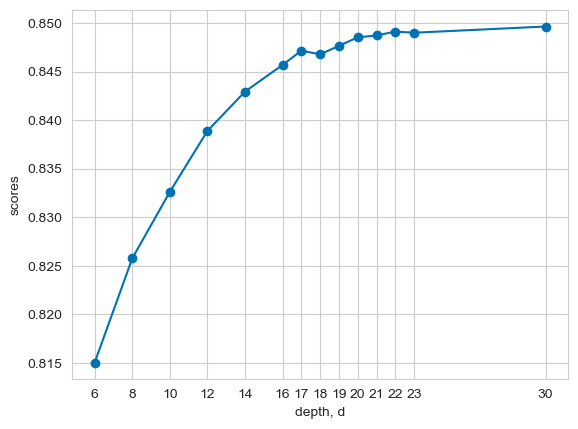

In [107]:
#Code Block 12

#depth = range(6,25)

#Chose to use a list instead of a rnage
depth = [6, 8, 10, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 30]

#Creates an empty list
scores = []

for d in depth:
    classifier=RandomForestClassifier(max_depth = d, random_state = 21)
    classifier=classifier.fit(X_train,y_train)
    score = classifier.score(X_test, y_test)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done. Accuracy = ".format(d) + str(score))


plt.plot(depth, scores, '-o')
plt.xlabel('depth, d')
plt.ylabel('scores')
plt.xticks(depth)
plt.show()

iteration 1 done. Accuracy = 0.7837889052063101
iteration 2 done. Accuracy = 0.8170922355393434
iteration 3 done. Accuracy = 0.8293381969775925
iteration 4 done. Accuracy = 0.8365862902079682
iteration 5 done. Accuracy = 0.8409683073570515
iteration 6 done. Accuracy = 0.8437870102799754
iteration 7 done. Accuracy = 0.8460609218816618
iteration 8 done. Accuracy = 0.8467241460988204
iteration 9 done. Accuracy = 0.848500639537638
iteration 10 done. Accuracy = 0.8488796248045857
iteration 11 done. Accuracy = 0.849116490596428
iteration 12 done. Accuracy = 0.8497086550760339
iteration 13 done. Accuracy = 0.8511535364062722
iteration 14 done. Accuracy = 0.8495191624425601
iteration 15 done. Accuracy = 0.850940357193614
iteration 16 done. Accuracy = 0.8496612819176654
iteration 17 done. Accuracy = 0.8495902221801127
iteration 18 done. Accuracy = 0.8507745511393244
iteration 19 done. Accuracy = 0.8497797148135866
iteration 20 done. Accuracy = 0.8495191624425601
iteration 21 done. Accuracy = 0.

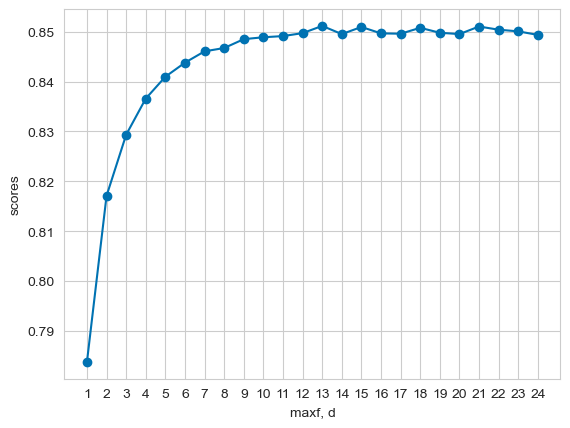

In [108]:
#Code Block 15

figsize=(20, 5)
maxf = range(1,25)
scores = []

for d in maxf:
    classifier=RandomForestClassifier(max_depth = 22, max_features = d, random_state=21)
    classifier=classifier.fit(X_train,y_train)
    score = classifier.score(X_test, y_test)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done. Accuracy = ".format(d) + str(score))


plt.plot(maxf, scores, '-o')
plt.xlabel('maxf, d')
plt.ylabel('scores')
plt.xticks(maxf)
plt.show()

iteration 1 done. Accuracy = 0.7885972807807097
iteration 20 done. Accuracy = 0.8440238760718177
iteration 50 done. Accuracy = 0.8482164005874272
iteration 100 done. Accuracy = 0.8511535364062722
iteration 150 done. Accuracy = 0.850324506134824
iteration 500 done. Accuracy = 0.850940357193614


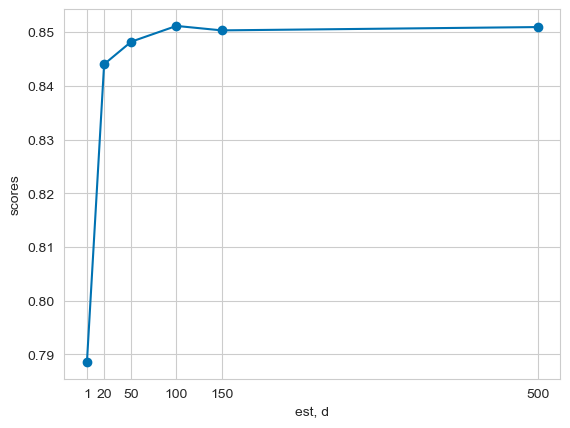

In [109]:
#Code Block 16

figsize=(20, 5)
est = [1, 20, 50, 100, 150, 500]
scores = []

for d in est:
    classifier=RandomForestClassifier(max_depth = 22, max_features = 13, n_estimators = d, random_state=21)
    classifier=classifier.fit(X_train,y_train)
    score = classifier.score(X_test, y_test)
    scores.append(classifier.score(X_test, y_test))
    print("iteration {} done. Accuracy = ".format(d) + str(score))


plt.plot(est, scores, '-o')
plt.xlabel('est, d')
plt.ylabel('scores')
plt.xticks(est)
plt.show()

### Run Optimal Model with class_weight = 'balanced'


In [110]:
%%time

#Code Block 21

vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth = 22, max_features = 13, n_estimators = 100, class_weight='balanced')

shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[29383  2460]
 [ 4033  6342]]

Accuracy Score: 0.8462
Recall Score: 0.6113
Precision Score: 0.7205
ROC AUC Score: 0.8849

CPU times: user 16.1 s, sys: 226 ms, total: 16.4 s
Wall time: 16.5 s


In [111]:
#Use a For Loop to determine the optimal class_weight
cw = [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:10}, 
      {0:1, 1:20}, {0:1, 1:25}, {0:1, 1:30}, {0:1, 1:50}, {0:1, 1:100}]

vartrain = X_train
vartest = X_test

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    model = RandomForestClassifier(max_depth = 22, max_features = 13, n_estimators = 100, class_weight=varcw)
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')

----------------------
Model with Class Weight: None

Confusion Matrix:
[[30394  1449]
 [ 4919  5456]]

Accuracy Score: 0.8492
Recall Score: 0.5259
Precision Score: 0.7902
ROC AUC Score: 0.8856

----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[29414  2429]
 [ 4053  6322]]

Accuracy Score: 0.8465
Recall Score: 0.6093
Precision Score: 0.7224
ROC AUC Score: 0.8846

----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[29890  1953]
 [ 4432  5943]]

Accuracy Score: 0.8488
Recall Score: 0.5728
Precision Score: 0.7527
ROC AUC Score: 0.8859

----------------------
Model with Class Weight: {0: 1, 1: 3}

Confusion Matrix:
[[29487  2356]
 [ 4110  6265]]

Accuracy Score: 0.8468
Recall Score: 0.6039
Precision Score: 0.7267
ROC AUC Score: 0.8844

----------------------
Model with Class Weight: {0: 1, 1: 5}

Confusion Matrix:
[[28570  3273]
 [ 3528  6847]]

Accuracy Score: 0.8389
Recall Score: 0.6600
Precision Score: 0.6766
ROC AUC Score: 0.881

### Selection of Optimal Model based on best accuracy, recall, and precision

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.846179

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[29432  2411]
 [ 4083  6292]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     31843
           1       0.72      0.61      0.66     10375

    accuracy                           0.85     42218
   macro avg       0.80      0.77      0.78     42218
weighted avg       0.84      0.85      0.84     42218


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



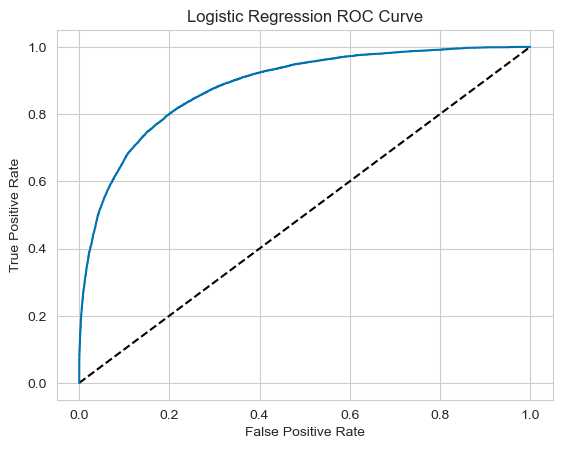

ROC AUC Score: 0.8840

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.84351842 0.84610699 0.84849254 0.84650525 0.84736815]

CV ROC AUC:
[0.87900016 0.88429698 0.88500811 0.88002956 0.88475772]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
CPU times: user 2min 10s, sys: 1.37 s, total: 2min 11s
Wall time: 2min 11s


In [112]:
%%time
#Code Block 23


vartrain = X_train
vartest = X_test
model = RandomForestClassifier(max_depth = 22, max_features = 13, n_estimators = 100, class_weight= 'balanced')

modeltraintest(vartrain, vartest, y_train, y_test, model)

### Random Search for Random Forest

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV


In [114]:
%%time

#Code Block 25


vartrain = X_train
vartest = X_test



grid={"criterion": ['gini', 'entropy'], "max_depth" : [17, 19, 21, 22,23],
      "n_estimators" : [100], "max_features" : [10, 11, 13, 14],
      "class_weight": [None]}
model_random = RandomForestClassifier(random_state=21, n_jobs=-2)
model_cv=RandomizedSearchCV(model_random,grid,cv=5)
model_cv.fit(vartrain,y_train)

print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :", model_cv.best_score_)

tuned hyperparameters :(best parameters)  {'n_estimators': 100, 'max_features': 13, 'max_depth': 22, 'criterion': 'gini', 'class_weight': None}
accuracy : 0.849149314790892
CPU times: user 14min, sys: 9.74 s, total: 14min 9s
Wall time: 2min 17s


### The Final Random Forest with Feature Importance  

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.851154

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[30443  1400]
 [ 4884  5491]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     31843
           1       0.80      0.53      0.64     10375

    accuracy                           0.85     42218
   macro avg       0.83      0.74      0.77     42218
weighted avg       0.85      0.85      0.84     42218


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



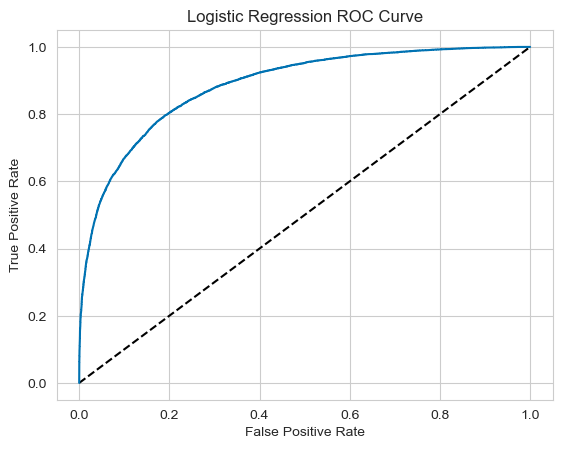

ROC AUC Score: 0.8860

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.84803573 0.84768044 0.85103035 0.84899244 0.85000761]

CV ROC AUC:
[0.88157355 0.88384967 0.88633314 0.88114305 0.88213923]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX
CPU times: user 2min 8s, sys: 2.26 s, total: 2min 11s
Wall time: 2min 10s


In [115]:
%%time

#Code Block 27

#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties
model = RandomForestClassifier(max_depth = 22, max_features = 13, n_estimators = 100, class_weight=None, criterion = 'gini', random_state=21)

modeltraintest(vartrain, vartest, y_train, y_test, model)

In [116]:
df_fi = pd.DataFrame(model.feature_importances_)
X_names = pd.DataFrame(list(X.columns))
df_feat_imp = pd.concat([df_fi, X_names], axis = 1)
df_feat_imp.columns = ['Importance', 'Features']
df_feat_imp[df_feat_imp['Importance']!=0].sort_values('Importance', ascending = False)


Importance               Features
9      0.147656            Humidity3pm
16     0.065233              RainToday
4      0.053205               Sunshine
11     0.050589            Pressure3pm
8      0.044603            Humidity9am
..          ...                    ...
105    0.000656    Location_SalmonGums
84     0.000624        Location_Darwin
74     0.000615  Location_AliceSprings
108    0.000593    Location_Townsville
94     0.000585     Location_Newcastle

[129 rows x 2 columns]

Confusion Matrix:
[[30443  1400]
 [ 4884  5491]]

Accuracy Score: 0.8512
Recall Score: 0.5293
Precision Score: 0.7968


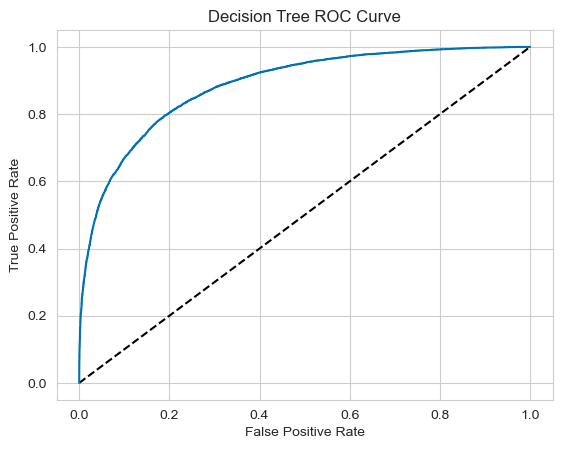

In [117]:
#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties
model_dt =  RandomForestClassifier(max_depth = 22, max_features = 13,n_estimators = 100 , class_weight=None, criterion = 'gini', random_state=21)

#Assess with the model
model_dt.fit(vartrain, y_train)

#Predict with the model
model_pred = model_dt.predict(vartest)
model_prob = model_dt.predict_proba(vartest)

df_model_pred = pd.DataFrame(model_pred)
df_model_pred = df_model_pred.rename(columns = {0:'pred_OPT_RF'})

print('Confusion Matrix:')
cm_dt = confusion_matrix(y_test, model_pred)
print(cm_dt)
print("")

#Assess with the model
score = model_dt.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

y_pred_prob = model_dt.predict_proba(vartest)[:,1]

dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(dt_fpr, dt_tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.show();

In [119]:
#Fine-tune the model to find the DECISION model¶
cw = [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:7.5}, {0:1, 1:10}, {0:1, 1:25},  {0:1, 1:100}]

vartrain = X_train
vartest = X_test

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    #Set the model properties
    model = RandomForestClassifier(max_depth = 22, max_features = 13, n_estimators = 100, 
                                   class_weight=varcw, criterion = 'gini', random_state=21)
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')


----------------------
Model with Class Weight: None

Confusion Matrix:
[[30443  1400]
 [ 4884  5491]]

Accuracy Score: 0.8512
Recall Score: 0.5293
Precision Score: 0.7968
ROC AUC Score: 0.8860

----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[29424  2419]
 [ 4089  6286]]

Accuracy Score: 0.8458
Recall Score: 0.6059
Precision Score: 0.7221
ROC AUC Score: 0.8835

----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[29932  1911]
 [ 4435  5940]]

Accuracy Score: 0.8497
Recall Score: 0.5725
Precision Score: 0.7566
ROC AUC Score: 0.8861

----------------------
Model with Class Weight: {0: 1, 1: 3}

Confusion Matrix:
[[29450  2393]
 [ 4066  6309]]

Accuracy Score: 0.8470
Recall Score: 0.6081
Precision Score: 0.7250
ROC AUC Score: 0.8846

----------------------
Model with Class Weight: {0: 1, 1: 5}

Confusion Matrix:
[[28552  3291]
 [ 3483  6892]]

Accuracy Score: 0.8395
Recall Score: 0.6643
Precision Score: 0.6768
ROC AUC Score: 0.881

Confusion Matrix:
[[28552  3291]
 [ 3483  6892]]

Accuracy Score: 0.8395
Recall Score: 0.6643
Precision Score: 0.6768


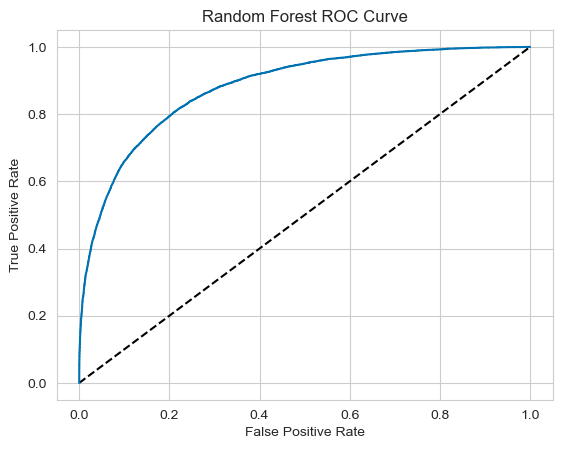

In [120]:
#Finding the decision model

#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties

model_dt_3 =  RandomForestClassifier(max_depth = 22, max_features = 13,n_estimators = 100 , class_weight={0:1, 1:5}, criterion = 'gini', random_state=21)

#Assess with the model
model_dt_3.fit(vartrain, y_train)

#Predict with the model
model_pred = model_dt_3.predict(vartest)
model_prob = model_dt_3.predict_proba(vartest)
df_model_pred = pd.DataFrame(model_pred)
df_model_pred = df_model_pred.rename(columns={0:'pred_DEC_RF'})
df_model_pred.head()


print('Confusion Matrix:')
cm_dt_3 = confusion_matrix(y_test, model_pred)
print(cm_dt_3)
print("")

#Assess with the model
score = model_dt_3.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

y_pred_prob = model_dt_3.predict_proba(vartest)[:,1]

dt_3_fpr, dt_3_tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(dt_3_fpr, dt_3_tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show();

In [164]:
#concatenating with previous results of logistic regression, optimal decision tree modelling
df_model_results_2 = pd.concat([df_model_results_2, df_model_pred],axis = 1)
df_model_results_2.sample(10, random_state = 112)

index  RainTomorrow  Pred_OPT_Log  Prob_OPT_No_Rain  Prob_OPT_Rain  \
13838   84334             1             0          0.504167       0.495833   
33213  113103             1             1          0.057035       0.942965   
30446   37949             0             0          0.821039       0.178961   
17110   19341             1             0          0.637286       0.362714   
26038  120364             0             0          0.912322       0.087678   
7251    79327             0             0          0.836634       0.163366   
806    111479             0             0          0.672780       0.327220   
20253  135690             1             1          0.428818       0.571182   
39855   16924             0             0          0.876612       0.123388   
11875   12104             0             0          0.971311       0.028689   

       pred_OPT_dt  pred_DEC_dt  pred_OPT_RF  pred_DEC_RF  
13838            0            1            0            0  
33213            1            1            1            1  
30446            0            0            0            0  
17110            1            1            1            1  
26038            0            0            0            0  
7251             0            1            0            0  
806              0            1            0            1  
20253            1            1            1            1  
39855            0            0            0            0  
11875            0            0            0            0

[Text(0, 0.5, 'No_Rain_Tomorrow'), Text(0, 1.5, 'Rain_Tomorrow')]

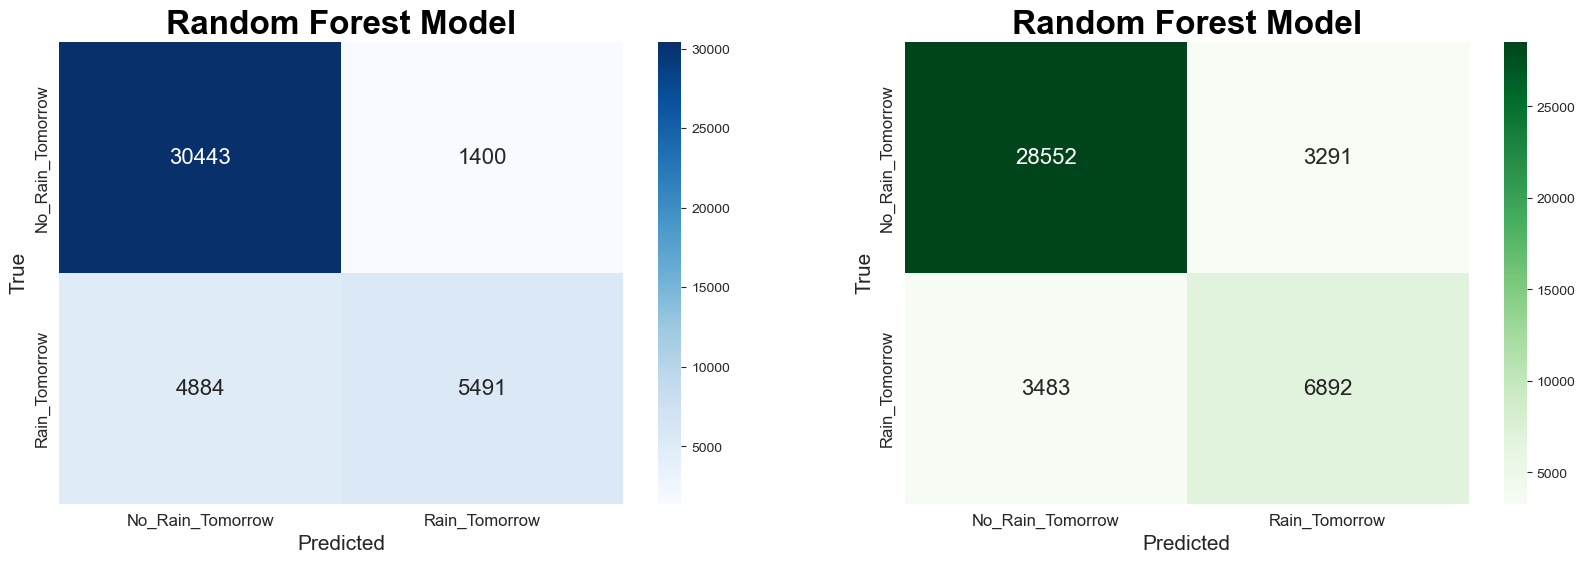

In [121]:
# comparing optimal and decision model
plt.figure(figsize=(20,6))


plt.subplot(121)


plt.title('Random Forest Model', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dt, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['No_Rain_Tomorrow', 'Rain_Tomorrow'], fontsize=12)
chart.yaxis.set_ticklabels(['No_Rain_Tomorrow', 'Rain_Tomorrow'], fontsize=12, va='center')


plt.subplot(122)
plt.title('Random Forest Model', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dt_3, annot=True, cmap="Greens", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['No_Rain_Tomorrow', 'Rain_Tomorrow'], fontsize=12)
chart.yaxis.set_ticklabels(['No_Rain_Tomorrow', 'Rain_Tomorrow'], fontsize=12, va='center')

* 28552: true negatives - days correctly predicted as not having rain tomorrow. 
* 3291: false positives - days incorrectly predicted to have rain tomorrow. 
* 3483: false negatives - days that were incorrectly predicted as not having rain tomorrow when it actually did. 
* 6892: true positives -  days correctly predicted to have rain tomorrow
* Accuracy - 83.95% of the model’s prediction are correct when deciding if it will rain the following day
* Precision - Model correctly identifies 67.68% of the days where the rain will occur 
* Recall - Model predicts rain 66.43% of the time it is correct 

<div style="background-color:blue; color:white; padding:20px">
<h2> 11. BEST MODEL</h2>
</div>

*  Since both the model resulted a good accuracy score, the decision of the best model depends on two factors:
* If the client is interested in a model to reducing the incorrect predictions of rain, they should go for random forest model. On the other hand, if the client's priority is to predict as many actual rainy days as possible, even at the risk of more false positives, they should go for logistic regression.

<div style="background-color:BLACK; color:white; padding:20px">
<h2> 12. CONCLUSIONS</h2>
</div>

* The project covered an extensive process from data collection to advanced modeling for rainfall prediction in Australia.
* Utilized a rich dataset with a decade of weather data from 49 different Australian locations.
* Emphasized rigorous data cleaning to ensure the accuracy of the analysis.
* Enabled clear visualization of weather trends and patterns, aiding in understanding regional climatic differences.
* Applied K-means clustering to identify similarities in weather patterns 
* Both Logistic Regression and Random Forest were implemented, with each showing strengths in binary classification.
* Random Forest was chosen for its higher accuracy and precision, proving to be more reliable in reducing incorrect rain predictions.
* The project sets a new standard for weather forecasting, which is crucial for decision-making in weather-sensitive sectors.
